In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [8]:
#part 1 数据的获取、导入、查看数据集整体信息

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import re as re
%matplotlib inline

In [9]:
# 读取训练集和测试集数据
train_df = pd.read_csv('cs-training.csv')
test_df = pd.read_csv('cs-test.csv')
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [11]:
#数据集规模
train_df.shape

(150000, 12)

In [12]:
#数据集变量类型
train_df.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [13]:
#变量描述性统计
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [14]:
#数据缺失情况概览
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [15]:
#part 2  EDA分析

#初步清洗+处理
#选择子集，第一列变量无含义删去
train_df.drop('Unnamed: 0',axis=1,inplace=True)
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [16]:
#列名重命名
colnames={'SeriousDlqin2yrs':'是否≥90天逾期未还', #目标变量，1表示坏客户，0表示好客户
         'RevolvingUtilizationOfUnsecuredLines':'信用卡额度使用率',
          'age':'年龄',
         'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天次数',
          'DebtRatio':'负债率',
          'MonthlyIncome':'月收入',
         'NumberOfOpenCreditLinesAndLoans':'信贷数量',
         'NumberOfTimes90DaysLate':'逾期90天次数',
         'NumberRealEstateLoansOrLines':'固定资产贷款数量',
         'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天次数',
         'NumberOfDependents':'家属数量'}
train_df.rename(columns=colnames,inplace=True)
train_df.head()


,是否≥90天逾期未还,信用卡额度使用率,年龄,逾期30-59天次数,负债率,月收入,信贷数量,逾期90天次数,固定资产贷款数量,逾期60-89天次数,家属数量
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


<Axes: xlabel='是否≥90天逾期未还', ylabel='count'>

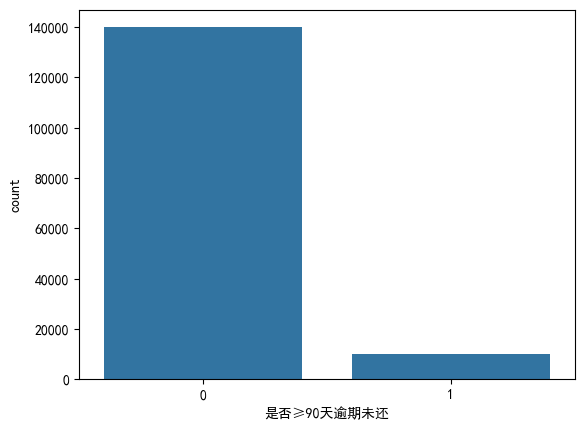

In [17]:
#EDA分析——是否有≥90天逾期未还
sns.countplot(x='是否≥90天逾期未还',data=train_df)

In [18]:
#目标变量‘是否≥90天逾期未还’，也即‘好坏客户’样本分布存在不均衡，需要后期处理
badNum=train_df.loc[train_df['是否≥90天逾期未还']==1,:].shape[0]
goodNum=train_df.loc[train_df['是否≥90天逾期未还']==0,:].shape[0]
print('好坏比:{0}%'.format(round(badNum*100/(goodNum+badNum),2)))

好坏比:6.68%


C:\Users\LEGION\AppData\Local\Temp\ipykernel_4216\4058922217.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['年龄'],ax=ax1) #分布图


<Axes: ylabel='年龄'>

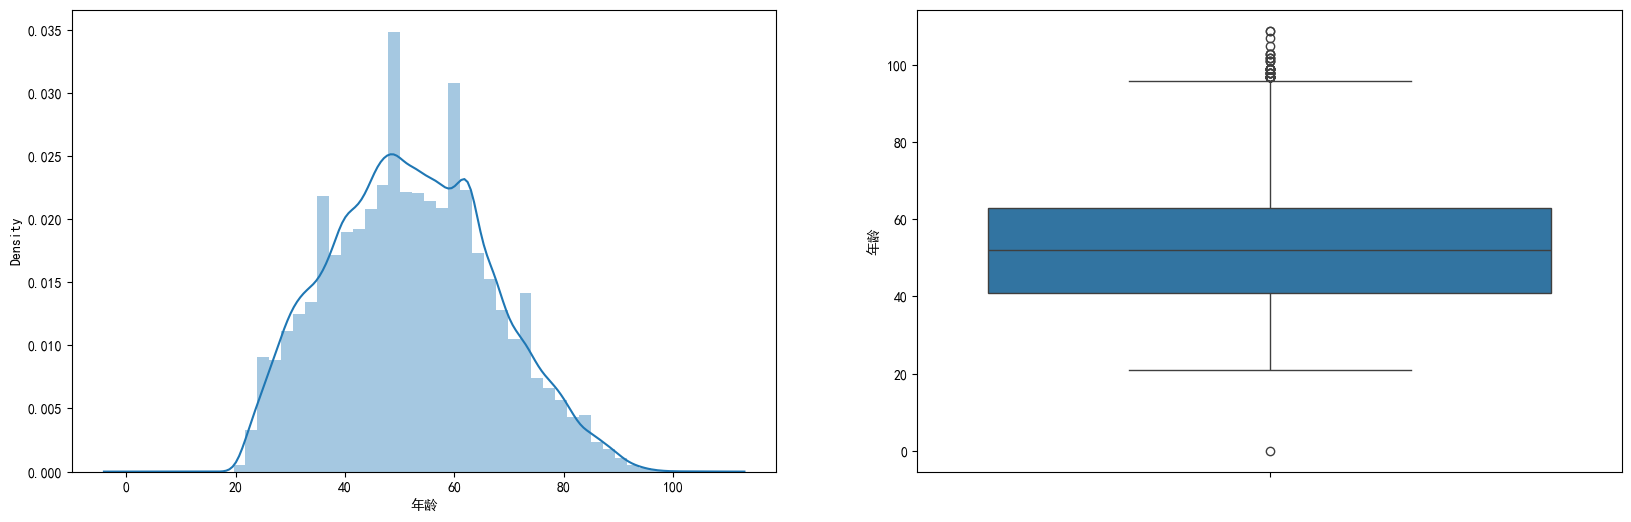

In [19]:
#EDA分析——年龄
#年龄的数据分布情况
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(20,6))
sns.distplot(train_df['年龄'],ax=ax1) #分布图
sns.boxplot(y='年龄',data=train_df,ax=ax2) #箱式图

In [20]:
#由箱式图可知样本存在年龄为0和超出100的异常值，可判定为噪声
#由分布图可知样本年龄基本服从正态分布,因此用三倍标准差确定异常值上下限，剔除异常值
age_mean=train_df['年龄'].mean()
age_std=train_df['年龄'].std()
age_lowlimit=age_mean-3*age_std
age_uplimit=age_mean+3*age_std
print('异常值下限：',age_lowlimit,'异常值上限：',age_uplimit)


异常值下限： 7.979609077365616 异常值上限： 96.61080425596771


In [21]:
#由计算得到的异常值上下限筛选异常值，若异常值占比较小，可以直接删去;否则要考虑用均值/中位数/随机森林/……进行替换
age_lowlimitd=train_df.loc[train_df['年龄']<age_lowlimit,:]
age_uplimitd=train_df.loc[train_df['年龄']>age_uplimit,:]
print('异常值下限比例：{0}%'.format(age_lowlimitd.shape[0]*100/train_df.shape[0]),
     '异常值上限比例：{0}%'.format(age_uplimitd.shape[0]*100/train_df.shape[0]))

异常值下限比例：0.0006666666666666666% 异常值上限比例：0.03%


<Axes: xlabel='年龄'>

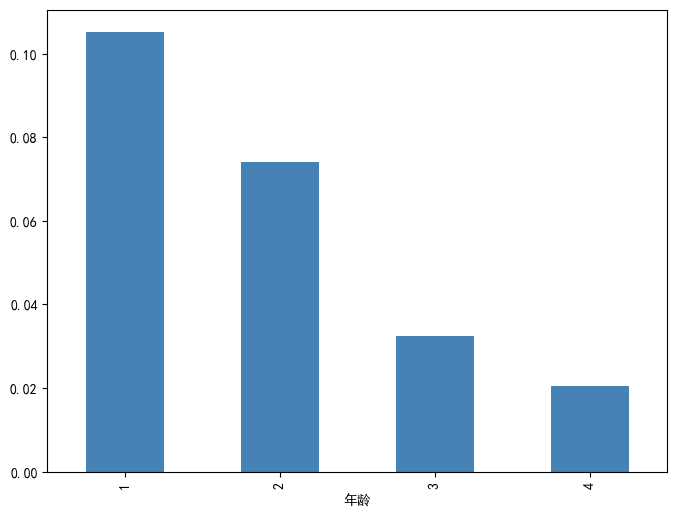

In [22]:
#对年龄特征做离散化处理进行展示并得到基础结论不代表后续特征分箱处理结果
#各年龄段违约情况：18-40岁的违约率最高
data_age=train_df.loc[train_df['年龄']>0,['年龄','是否≥90天逾期未还']]
data_age.loc[(data_age['年龄']>18)&(data_age['年龄']<40),'年龄'] = 1
data_age.loc[(data_age['年龄']>=40)&(data_age['年龄']<60),'年龄'] = 2
data_age.loc[(data_age['年龄']>=60)&(data_age['年龄']<80),'年龄'] = 3
data_age.loc[(data_age['年龄']>=80),'年龄'] = 4
age_Isdlq=data_age.groupby('年龄')['是否≥90天逾期未还'].sum()
age_total=data_age.groupby('年龄')['是否≥90天逾期未还'].count()
age_Isratio=age_Isdlq/age_total
age_Isratio.plot(kind='bar',figsize=(8,6),color='#4682B4')

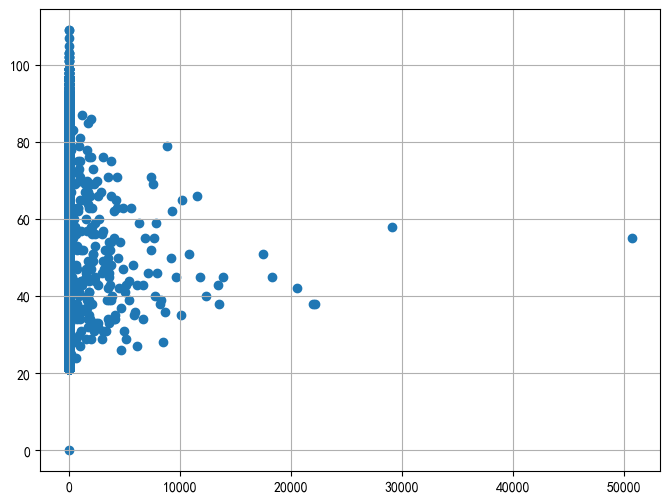

In [23]:
#EDA——信用卡额度使用率
#RevolvingUtilizationOfUnsecuredLines未担保循环信用额度的使用率，指的是借款人在循环信用账户（如信用卡）上使用的信用额度与可获得的总信用额度的比例，一般在0-1，＞1表明信用卡超额使用
#此处信用卡额度使用率分布分散，可能存在数值为未除以分母信用卡额度
figure=plt.figure(figsize=(8,6))
plt.scatter(train_df['信用卡额度使用率'],train_df['年龄'])
plt.grid()

In [24]:
#IQR（Interquartile Range）四分位距法：是把全部变量值分为四部分的分位数，即第1四分位数（Q1=P25）、第2四分位数（Q2=P50）、第3四分位数（Q3=P75）。四分位数间距（interquartile range，IQR）是由第3四分位数和第1四分位数相减而得，它一般和中位数一起描述偏态分布资料的分布特征。
percent_25=np.percentile(train_df['信用卡额度使用率'],25)
percent_75=np.percentile(train_df['信用卡额度使用率'],75)
Revol_lowlimit=percent_25-1.5*(percent_75-percent_25)
Revol_uplimit=percent_75+1.5*(percent_75-percent_25)
print('异常值下限值：',Revol_lowlimit,'异常值上限值：',Revol_uplimit)


异常值下限值： -0.7639007662499999 异常值上限值： 1.35281445575


C:\Users\LEGION\AppData\Local\Temp\ipykernel_4216\2768645268.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['信用卡额度使用率'],ax=ax1,bins=10)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_4216\2768645268.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['信用卡额度使用率'],ax=ax2,bins=10)


<Axes: xlabel='信用卡额度使用率', ylabel='Density'>

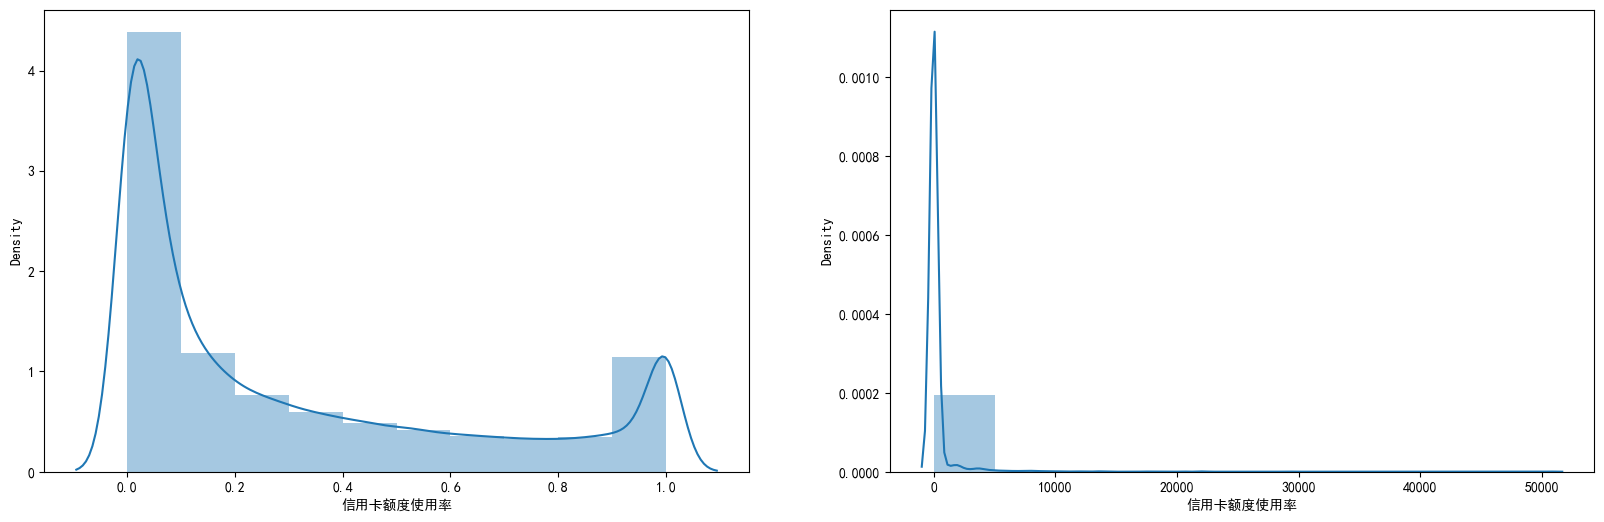

In [25]:
#IQR说明异常值位于＞1部分，但是选用1.35作为异常值筛选掉过多使用率＞1的样本，应对样本进行细化，找异常值的阈值
#将数据分为两部分，小于1和大于1的部分
data1=train_df.loc[train_df['信用卡额度使用率']<1,:]
data2=train_df.loc[train_df['信用卡额度使用率']>=1,:]
#看一下两部分数据分布情况
fig=plt.figure(figsize=(20,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.distplot(data1['信用卡额度使用率'],ax=ax1,bins=10)
sns.distplot(data2['信用卡额度使用率'],ax=ax2,bins=10)


C:\Users\LEGION\AppData\Local\Temp\ipykernel_4216\2501543358.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[(train_df['信用卡额度使用率']>=1)&(train_df['信用卡额度使用率']<100),'信用卡额度使用率'],bins=10,ax=ax1)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_4216\2501543358.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

<Axes: xlabel='信用卡额度使用率', ylabel='Density'>

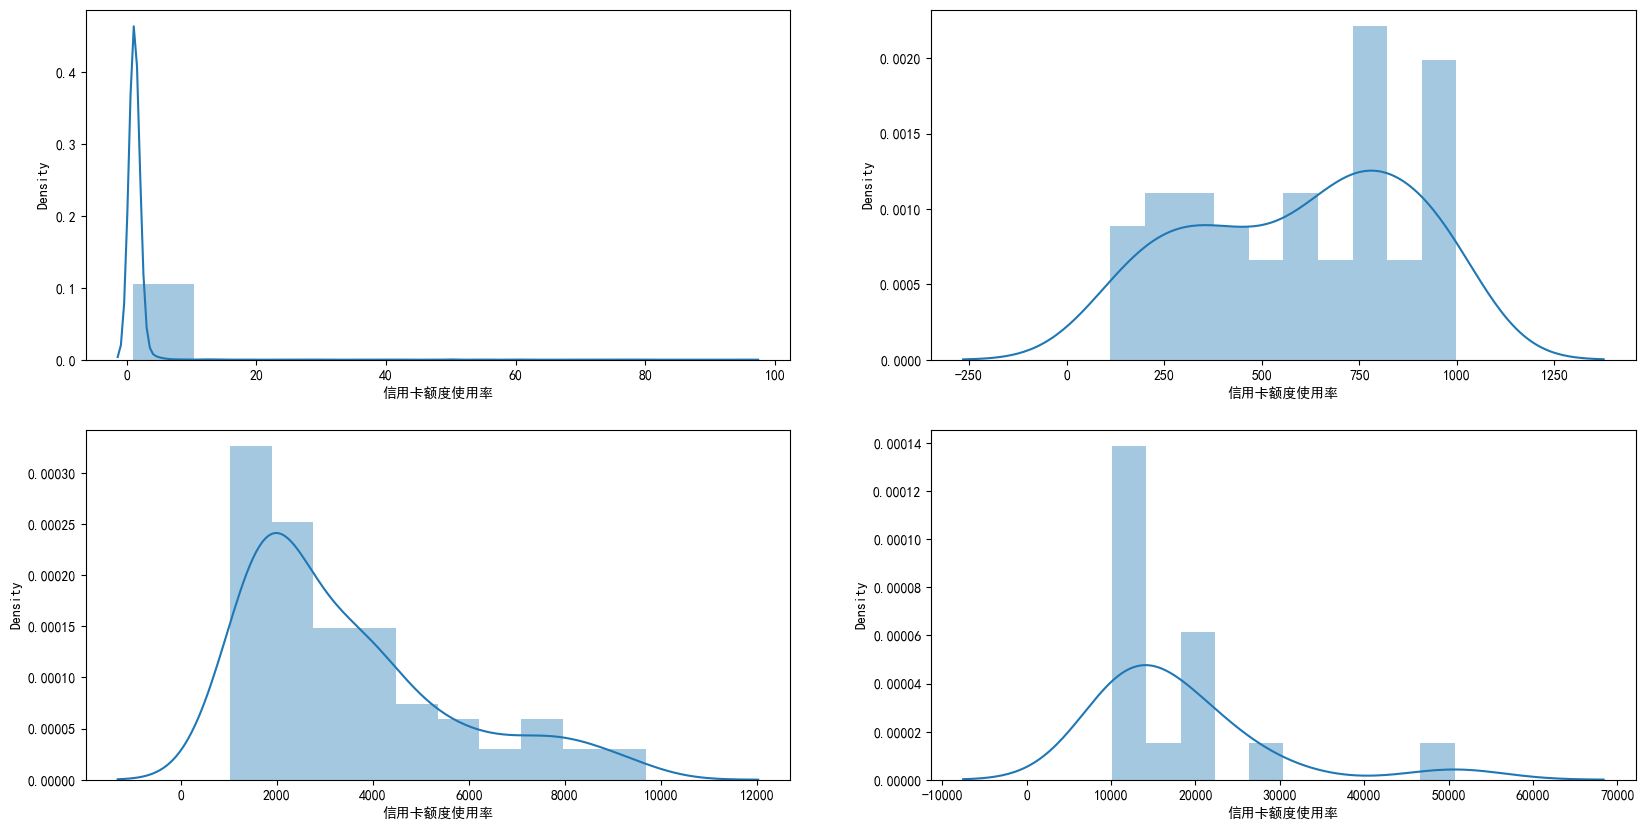

In [26]:
#对大于1的部分进行进一步细分[1，100）[100，1000），[1000，10000），10000以上
fig,[[ax1,ax2],[ax3,ax4]]=plt.subplots(2,2,figsize=(20,10))
sns.distplot(train_df.loc[(train_df['信用卡额度使用率']>=1)&(train_df['信用卡额度使用率']<100),'信用卡额度使用率'],bins=10,ax=ax1)
sns.distplot(train_df.loc[(train_df['信用卡额度使用率']>=100)&(train_df['信用卡额度使用率']<1000),'信用卡额度使用率'],bins=10,ax=ax2)
sns.distplot(train_df.loc[(train_df['信用卡额度使用率']>=1000)&(train_df['信用卡额度使用率']<10000),'信用卡额度使用率'],bins=10,ax=ax3)
sns.distplot(train_df.loc[train_df['信用卡额度使用率']>=10000,'信用卡额度使用率'],bins=10,ax=ax4)


In [27]:
#细分后发现大于1时信用卡额度使用率集中在0-20
#分段查看各段违约率情况，得到基本结论:可以看出在Revol大于1时，违约率开始上升，10-20之间违约率达到高峰，超过20后开始下降，超过1000后开始恢复正常（与0-1的违约率一致），说明20左右的值可能为异常值上限的阈值。
#可以将超过20的值都定义为异常值，同样不做为分箱结果
#将区间分为（0-1），(1-10),（10-20），（20-100），（100,1000），（1000-10000），（10000,51000）看一下违约率情况
data_1=train_df.loc[(train_df['信用卡额度使用率']>=0)&(train_df['信用卡额度使用率']<1),:]
Is_1=data_1.loc[data_1['是否≥90天逾期未还']==1,:].shape[0]*100/data_1.shape[0]

data_2=train_df.loc[(train_df['信用卡额度使用率']>=1)&(train_df['信用卡额度使用率']<10),:]
Is_2=data_2.loc[data_2['是否≥90天逾期未还']==1,:].shape[0]*100/data_2.shape[0]

data_3=train_df.loc[(train_df['信用卡额度使用率']>=10)&(train_df['信用卡额度使用率']<20),:]
Is_3=data_3.loc[data_3['是否≥90天逾期未还']==1,:].shape[0]*100/data_3.shape[0]

data_4=train_df.loc[(train_df['信用卡额度使用率']>=20)&(train_df['信用卡额度使用率']<100),:]
Is_4=data_4.loc[data_4['是否≥90天逾期未还']==1,:].shape[0]*100/data_4.shape[0]

data_5=train_df.loc[(train_df['信用卡额度使用率']>=100)&(train_df['信用卡额度使用率']<1000),:]
Is_5=data_5.loc[data_5['是否≥90天逾期未还']==1,:].shape[0]*100/data_5.shape[0]

data_6=train_df.loc[(train_df['信用卡额度使用率']>=1000)&(train_df['信用卡额度使用率']<10000),:]
Is_6=data_6.loc[data_6['是否≥90天逾期未还']==1,:].shape[0]*100/data_6.shape[0]

data_7=train_df.loc[(train_df['信用卡额度使用率']>=10000)&(train_df['信用卡额度使用率']<51000),:]
Is_7=data_7.loc[data_7['是否≥90天逾期未还']==1,:].shape[0]*100/data_7.shape[0]

print('0-1违约率为：{0}%'.format(Is_1),
     '1-10违约率为：{0}%'.format(Is_2),
     '10-20违约率为：{0}%'.format(Is_3), 
     '20-100违约率为：{0}%'.format(Is_4),
     '100-1000违约率为：{0}%'.format(Is_5),
     '1000-10000违约率为：{0}%'.format(Is_6),
     '10000-51000违约率为：{0}%'.format(Is_7))

0-1违约率为：5.989963317014633% 1-10违约率为：39.52211817888279% 10-20违约率为：57.142857142857146% 20-100违约率为：18.181818181818183% 100-1000违约率为：1.9607843137254901% 1000-10000违约率为：6.410256410256411% 10000-51000违约率为：0.0%


<Axes: ylabel='负债率'>

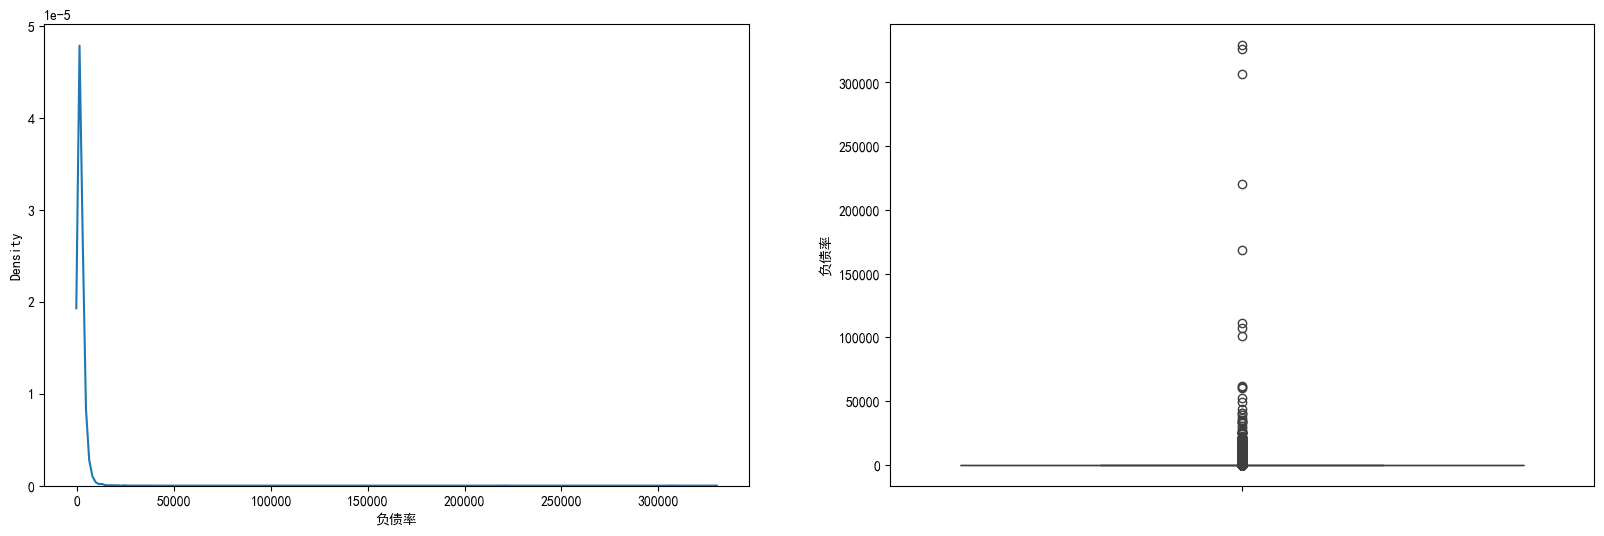

In [28]:
#EDA——负债率
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(20,6))
sns.kdeplot(train_df['负债率'],ax=ax1)
sns.boxplot(y=train_df['负债率'],ax=ax2)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_4216\2447561847.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Debt1['负债率'],ax=ax1)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_4216\2447561847.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Debt2['负债率'],ax=ax2)


<Axes: xlabel='负债率', ylabel='Density'>

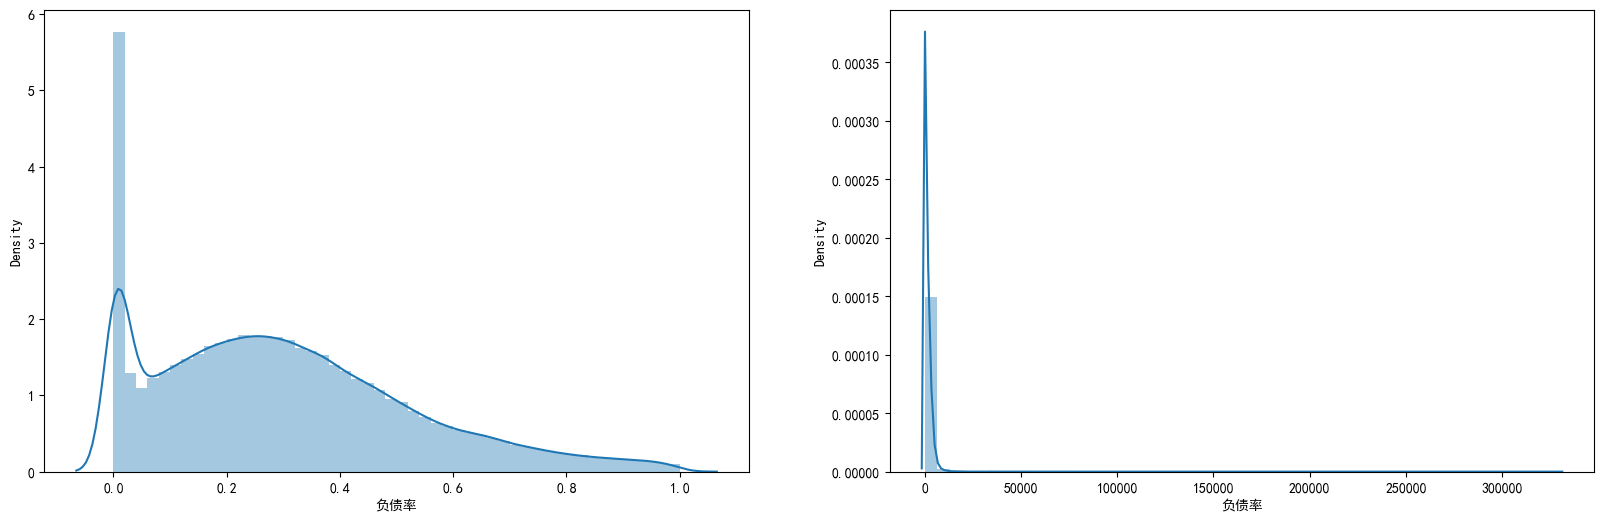

In [29]:
Debt1=train_df.loc[train_df['负债率']<1,:]
Debt2=train_df.loc[train_df['负债率']>=1,:]
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(20,6))
sns.distplot(Debt1['负债率'],ax=ax1)
sns.distplot(Debt2['负债率'],ax=ax2)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_4216\2361465403.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Debt3['负债率'],ax=ax1)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_4216\2361465403.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Debt4['负债率'],ax=ax2)
C:\Users\LEGION\AppData\Loc

<Axes: xlabel='负债率', ylabel='Density'>

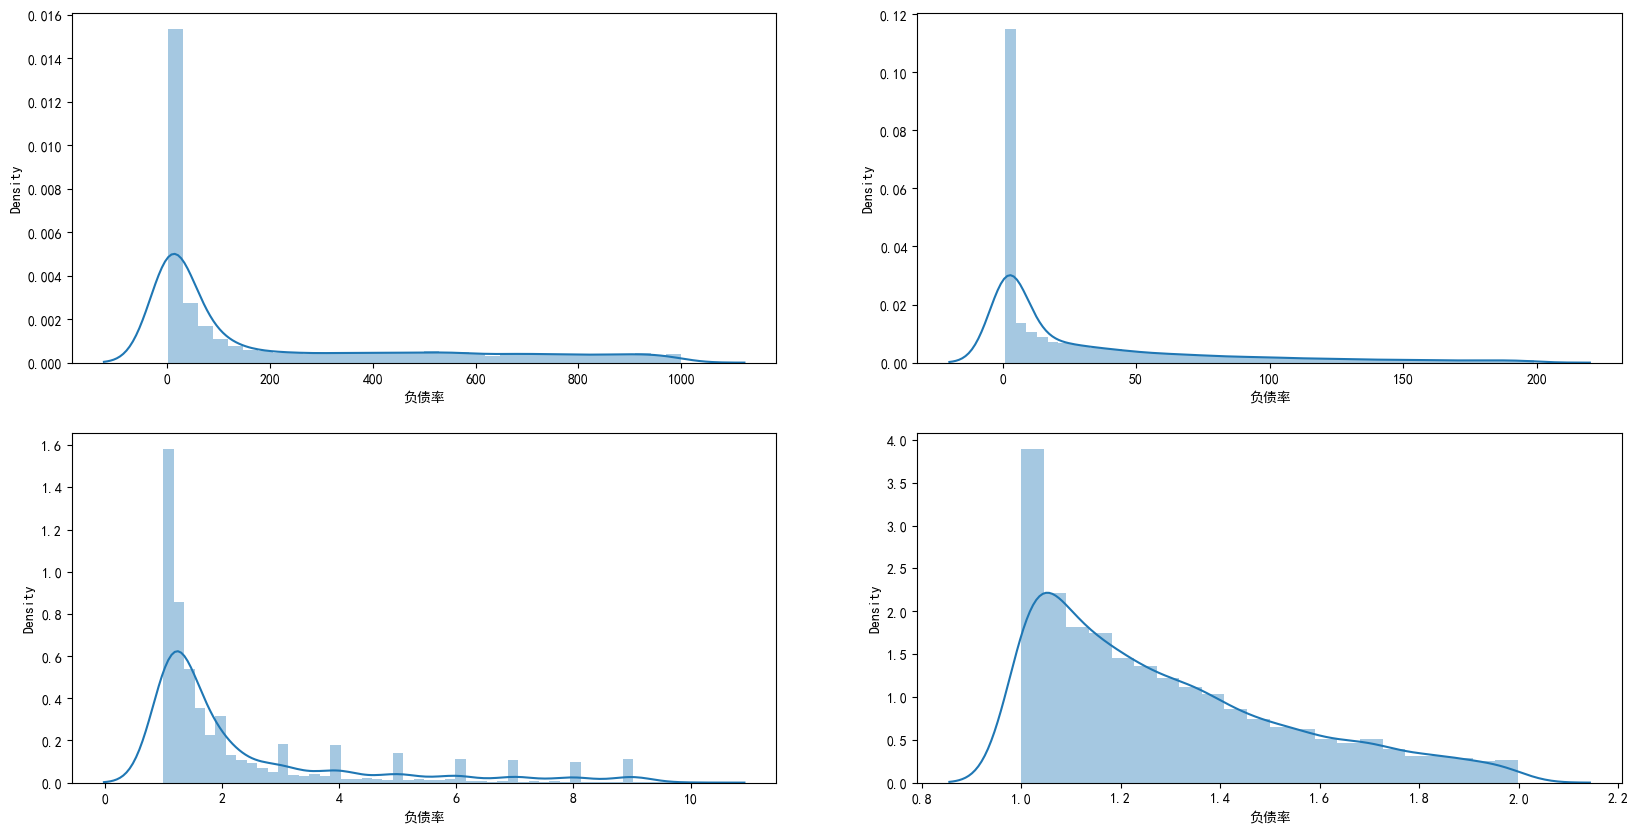

In [30]:
#与信用卡使用额度类似，负债率分布跨度较大，需要进行细分以判断异常值上限
#尝试多次细分
Debt3=train_df.loc[(train_df['负债率']>=1)&(train_df['负债率']<1000),:]
Debt4=train_df.loc[(train_df['负债率']>=1)&(train_df['负债率']<200),:]
Debt5=train_df.loc[(train_df['负债率']>=1)&(train_df['负债率']<10),:]
Debt6=train_df.loc[(train_df['负债率']>=1)&(train_df['负债率']<2),:]

fig,[[ax1,ax2],[ax3,ax4]]=plt.subplots(2,2,figsize=(20,10))
sns.distplot(Debt3['负债率'],ax=ax1)
sns.distplot(Debt4['负债率'],ax=ax2)
sns.distplot(Debt5['负债率'],ax=ax3)
sns.distplot(Debt6['负债率'],ax=ax4)

In [31]:
#此处密度直方图概率和为1在图上的体现是围成的面积为1，因此存在密度大于1的情况
#负债率大于1部分集中在1-2，估计异常值上限为2，以下用分组后负债率与违约率的相关情况加以佐证
#得到结论：0-2期间随着负债率升高，违约率也升高，1-2的违约率达到最高，超过2以后违约率开始稳定，我们把2作为异常值上限的阈值。并把大于2的数据和0-1的数据进行合并。
#各区间的违约率(0,1),(1-2),(2-10),(10-50),(50-200),(200,1000),1000以上
Debt_1=train_df.loc[(train_df['负债率']>=0)&(train_df['负债率']<1),:]
DebIs_1=Debt_1.loc[Debt_1['是否≥90天逾期未还']==1,:].shape[0]*100/Debt_1.shape[0]

Debt_2=train_df.loc[(train_df['负债率']>=1)&(train_df['负债率']<2),:]
DebIs_2=Debt_2.loc[Debt_2['是否≥90天逾期未还']==1,:].shape[0]*100/Debt_2.shape[0]

Debt_3=train_df.loc[(train_df['负债率']>=2)&(train_df['负债率']<10),:]
DebIs_3=Debt_3.loc[Debt_3['是否≥90天逾期未还']==1,:].shape[0]*100/Debt_3.shape[0]

Debt_4=train_df.loc[(train_df['负债率']>=10)&(train_df['负债率']<50),:]
DebIs_4=Debt_4.loc[Debt_4['是否≥90天逾期未还']==1,:].shape[0]*100/Debt_4.shape[0]

Debt_5=train_df.loc[(train_df['负债率']>=50)&(train_df['负债率']<200),:]
DebIs_5=Debt_5.loc[Debt_5['是否≥90天逾期未还']==1,:].shape[0]*100/Debt_5.shape[0]

Debt_6=train_df.loc[(train_df['负债率']>=200)&(train_df['负债率']<1000),:]
DebIs_6=Debt_6.loc[Debt_6['是否≥90天逾期未还']==1,:].shape[0]*100/Debt_6.shape[0]

Debt_7=train_df.loc[train_df['负债率']>=1000,:]
DebIs_7=Debt_7.loc[Debt_7['是否≥90天逾期未还']==1,:].shape[0]*100/Debt_7.shape[0]

print('0-1违约率为：{0}%'.format(DebIs_1),
     '1-2违约率为：{0}%'.format(DebIs_2),
     '2-10违约率为：{0}%'.format(DebIs_3), 
     '10-50违约率为：{0}%'.format(DebIs_4),
     '50-200违约率为：{0}%'.format(DebIs_5),
     '200-1000违约率为：{0}%'.format(DebIs_6),
     '1000以上违约率为：{0}%'.format(DebIs_7))

0-1违约率为：6.744944780780571% 1-2违约率为：13.008913514815706% 2-10违约率为：6.2584421431787485% 10-50违约率为：4.346383543463835% 50-200违约率为：5.62695380340396% 200-1000违约率为：7.950330591840026% 1000以上违约率为：4.905325443786983%


C:\Users\LEGION\AppData\Local\Temp\ipykernel_4216\2198486448.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['信贷数量'],ax=ax1)


<Axes: ylabel='信贷数量'>

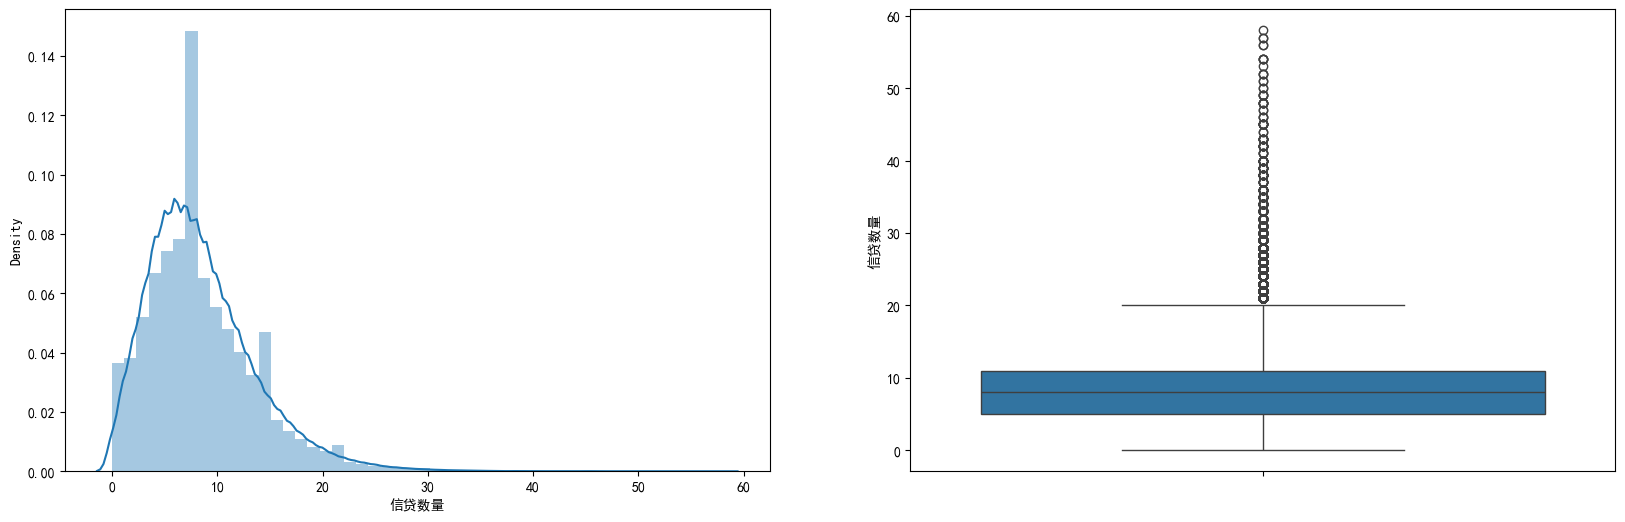

In [32]:
#EDA——信贷数量
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(20,6))
sns.distplot(train_df['信贷数量'],ax=ax1)
sns.boxplot(y=train_df['信贷数量'],ax=ax2)

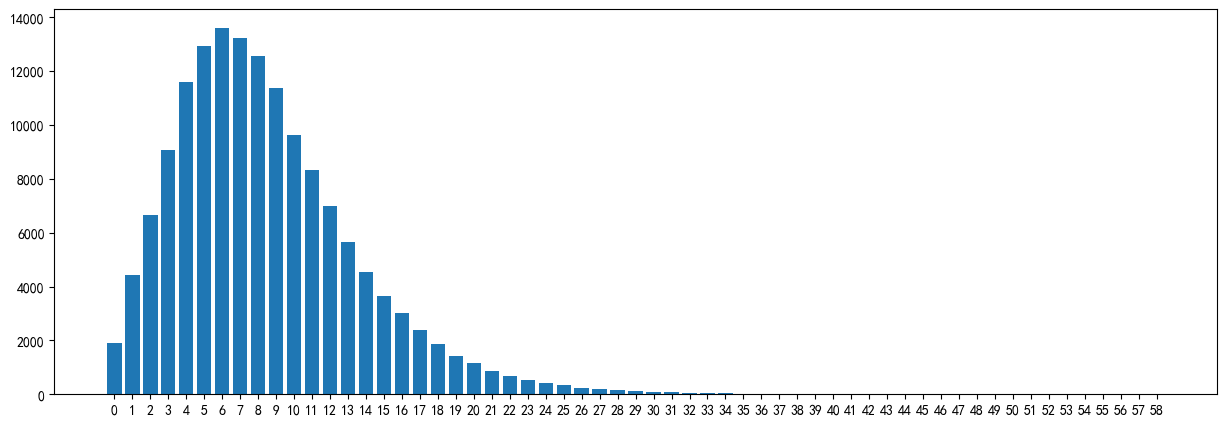

In [33]:
#信贷数量基本服从正态分布，大于30部分总体占比较小，细化数据分布图
plt.figure(figsize=(15, 5)) #调整画布大小
counts = train_df["信贷数量"].value_counts()
plt.bar(counts.index, counts.values)
# 获取所有存在的整数范围
min_val = int(counts.index.min())
max_val = int(counts.index.max())
plt.xticks(range(min_val, max_val + 1))  # 生成连续的整数刻度
plt.show()

<Axes: xlabel='信贷数量'>

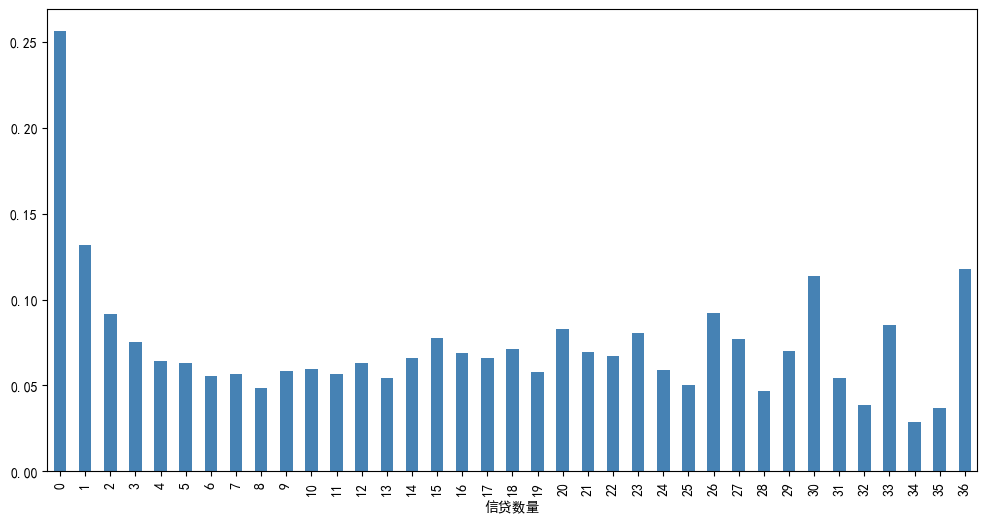

In [34]:
#大于36的部分较少，归并为36
#此时违约情况与信贷数量关系如下
train_df.loc[train_df['信贷数量']>36,'信贷数量']=36
Numopen_dlq=train_df.groupby(['信贷数量'])['是否≥90天逾期未还'].sum()
Numopen_total=train_df.groupby(['信贷数量'])['是否≥90天逾期未还'].count()
Numopen_dlqratio=Numopen_dlq/Numopen_total
Numopen_dlqratio.plot(kind='bar',figsize=(12,6),color='#4682B4')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_4216\1803317074.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['固定资产贷款数量'],ax=ax1)


<Axes: ylabel='固定资产贷款数量'>

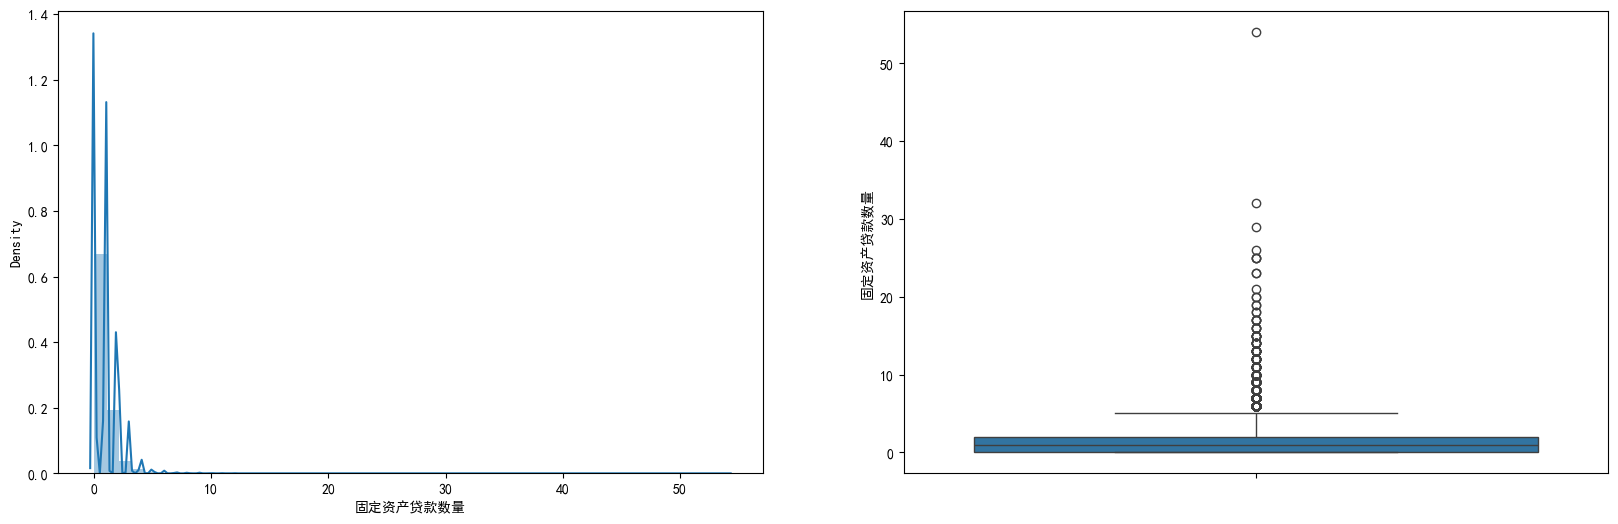

In [35]:
#EDA——固定资产贷款数量
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(20,6))
sns.distplot(train_df['固定资产贷款数量'],ax=ax1)
sns.boxplot(y=train_df['固定资产贷款数量'],ax=ax2)

In [36]:
#大于50为明显异常值
#train_df['固定资产贷款数量'].value_counts().plot.bar()
#plt.show()
print(train_df['固定资产贷款数量'].value_counts().sort_index())
#此处用count进行展示，因为直方图纵轴跨度过大，54出的异常值出现频次无法显示

固定资产贷款数量
0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
18        2
19        2
20        2
21        1
23        2
25        3
26        1
29        1
32        1
54        1
Name: count, dtype: int64


<Axes: xlabel='固定资产贷款数量'>

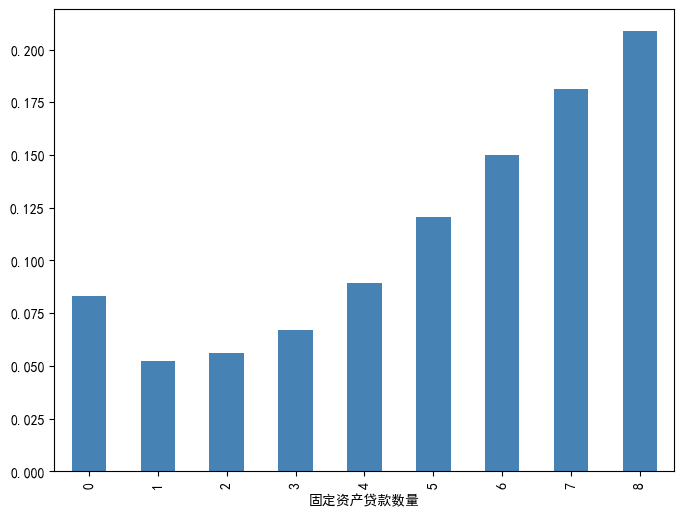

In [37]:
#因为8-54期间的count相较于整体较小，进行合并，将大于8的数据和8合并后查看违约率的情况
#得到基础结论：违约率在固定资产贷款数量为1时达到最低，后随贷款数量的增加而增加
train_df.loc[train_df['固定资产贷款数量']>8,'固定资产贷款数量']=8
Numestate_dlq=train_df.groupby(['固定资产贷款数量'])['是否≥90天逾期未还'].sum()
Numestate_total=train_df.groupby(['固定资产贷款数量'])['是否≥90天逾期未还'].count()
Numestate_dlqratio=Numestate_dlq/Numestate_total
Numestate_dlqratio.plot(kind='bar',figsize=(8,6),color='#4682B4')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_4216\1105918167.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['家属数量'],ax=ax1)


<Axes: ylabel='家属数量'>

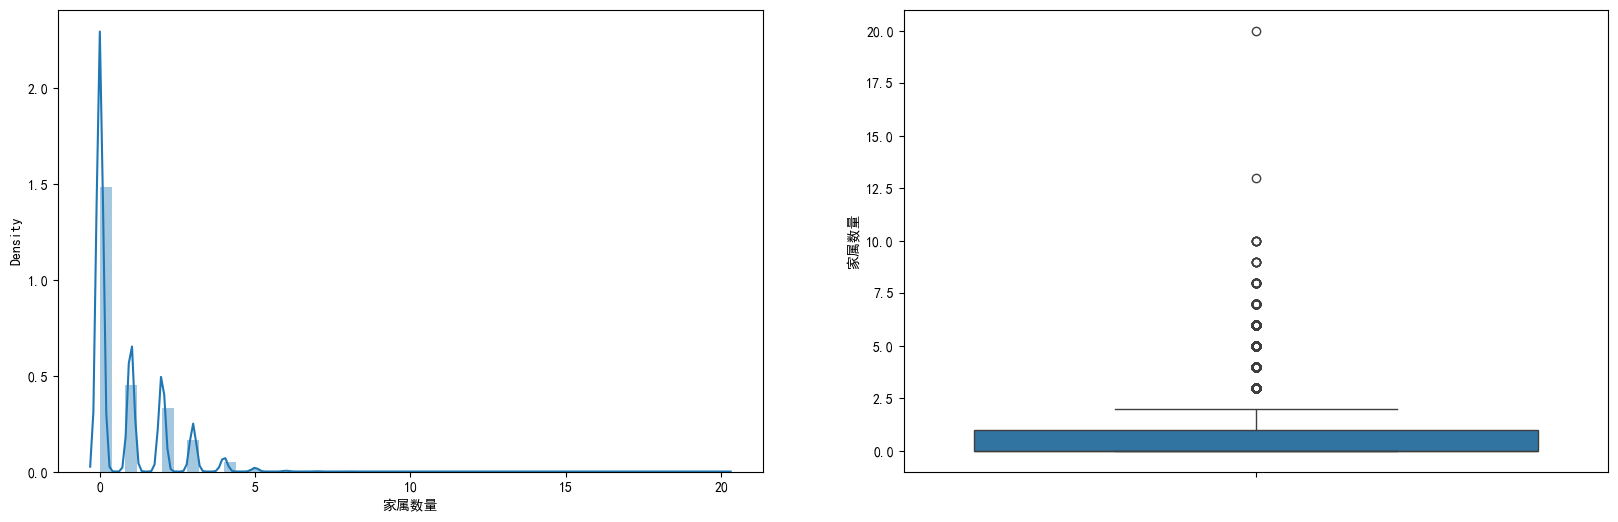

In [38]:
#EDA——家属数量
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(20,6))
sns.distplot(train_df['家属数量'],ax=ax1)
sns.boxplot(train_df['家属数量'],ax=ax2)

In [39]:
D_nullNum=train_df['家属数量'].isnull().sum()
print('缺失值数量：',D_nullNum,'缺失值比率：{0}%'.format(D_nullNum*100/train_df.shape[0]))

缺失值数量： 3924 缺失值比率：2.616%


In [40]:
#MonthlyIncome和Numdepend的缺失存在关联：Numdepend缺失的，MonthlyIncome也同时缺失。因此通过MonthlyIncome缺失时Numdepend的分布可以推测出Numdepend的缺失值
train_df.loc[(train_df['家属数量'].isnull())&(train_df['月收入'].isnull()),:].shape[0]

3924

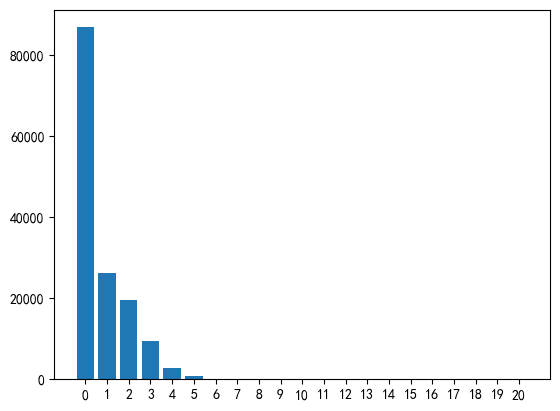

In [41]:
#可以发现月收入缺失的时候家属数量多为0，因此以0作为家属数量缺失值的填充
MonthNullDependNot=train_df.loc[(train_df['家属数量'].notnull())&(train_df['家属数量']).isnull(),:]
counts = train_df["家属数量"].value_counts()
plt.bar(counts.index, counts.values)
min_val = int(counts.index.min())
max_val = int(counts.index.max())
plt.xticks(range(min_val, max_val + 1)) 
plt.show()

<Axes: ylabel='月收入'>

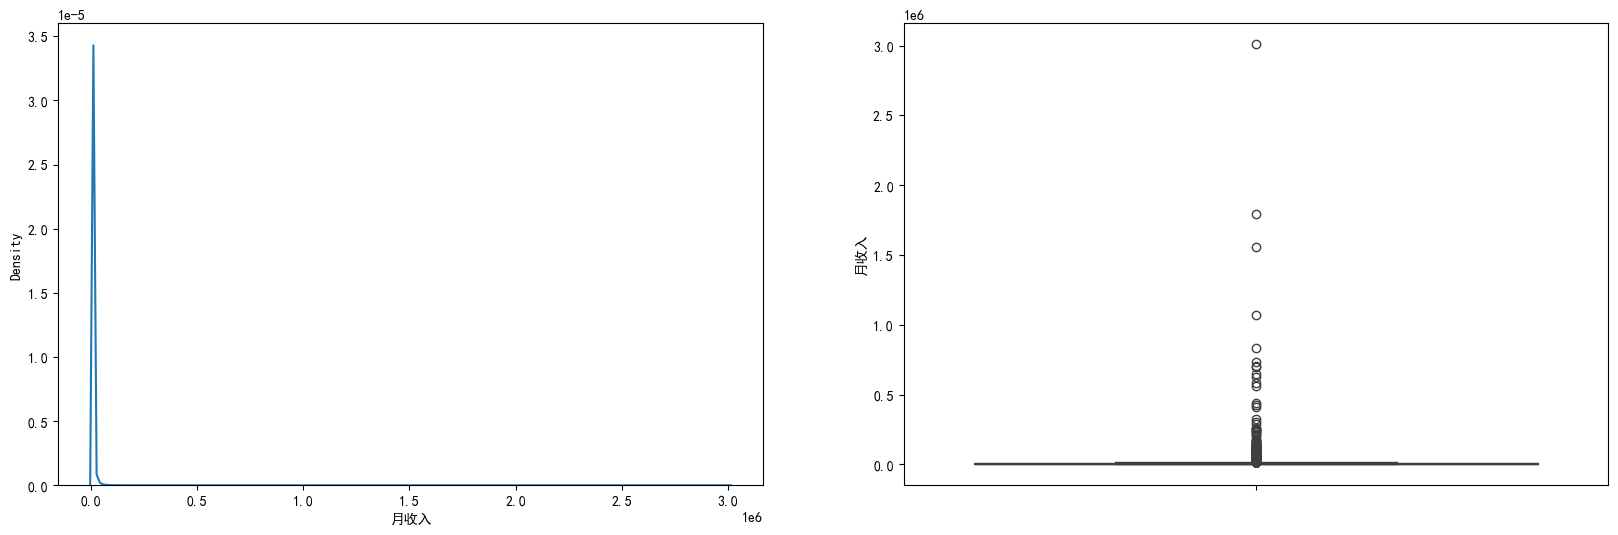

In [42]:
#EDA——月收入
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(20,6))
sns.kdeplot(train_df['月收入'],ax=ax1)
sns.boxplot(y=train_df['月收入'],ax=ax2)

In [43]:
#MonthlyIncome缺失值情况
#月收入缺失值接近20%
M_nullNum=train_df['月收入'].isnull().sum()
print('缺失值数量：',M_nullNum,'缺失值比率：{0}%'.format(M_nullNum*100/train_df.shape[0]))

缺失值数量： 29731 缺失值比率：19.820666666666668%


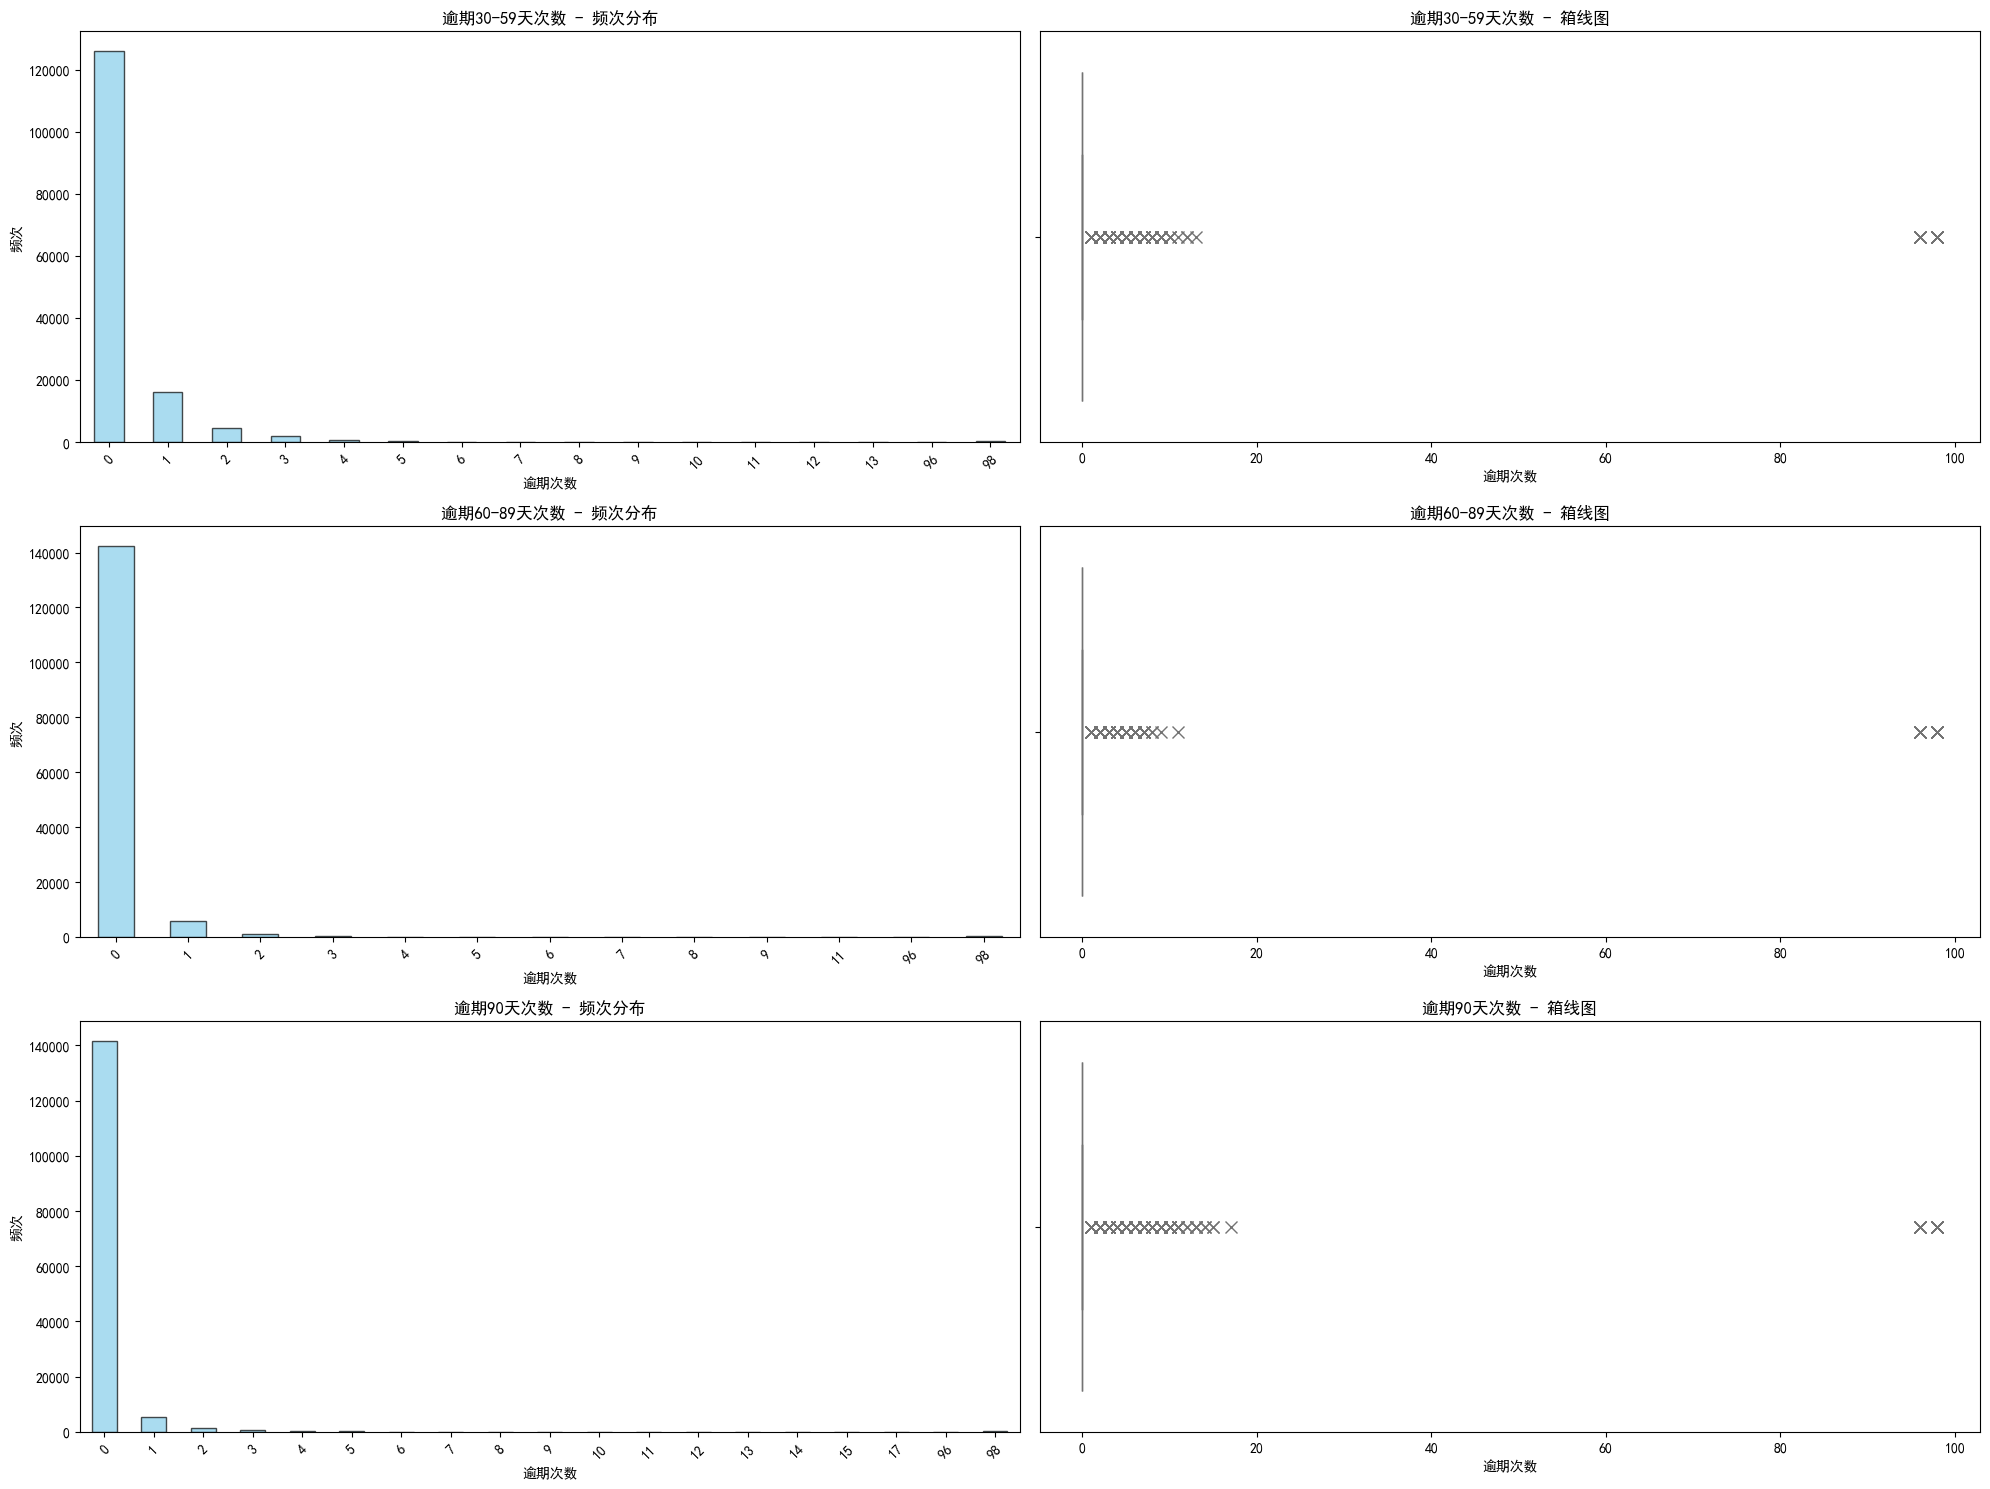

In [44]:
#EDA——逾期30-59/60-89/90天及以上的次数
#得出结论：大于90的为明显异常值
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # 调整画布尺寸
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # 控制子图间距
columns = ['逾期30-59天次数', '逾期60-89天次数', '逾期90天次数']
for i, col in enumerate(columns):
    ax_bar = axes[i, 0]
    counts = train_df[col].value_counts().sort_index()
    counts.plot.bar(ax=ax_bar, color='skyblue', edgecolor='black', alpha=0.7)
    ax_bar.set_title(f"{col} - 频次分布", fontsize=12)
    ax_bar.set_xlabel("逾期次数", fontsize=10)
    ax_bar.set_ylabel("频次", fontsize=10)
    ax_bar.tick_params(axis='x', rotation=45)
    ax_box = axes[i, 1]
    sns.boxplot(x=train_df[col], ax=ax_box, color='lightgreen', flierprops={'marker': 'x', 'markersize': 8})
    ax_box.set_title(f"{col} - 箱线图", fontsize=12)
    ax_box.set_xlabel("逾期次数", fontsize=10)
plt.tight_layout()
plt.show()

In [45]:
#part 3 数据清洗

#数据预处理——异常值处理
#age异常值处理
train_df=train_df[train_df['年龄']>0]

#Num30-59late Num60-89late Num90late异常值处理
train_df=train_df[train_df['逾期30-59天次数']<90]
train_df=train_df[train_df['逾期60-89天次数']<90]
train_df=train_df[train_df['逾期90天次数']<90]

#Numestate异常值处理
train_df=train_df[train_df['固定资产贷款数量']<50]


In [46]:
#数据预处理——缺失值处理
#家属数量缺失值处理
train_df['家属数量']=train_df['家属数量'].fillna('0')
#MonthlyIncome缺失值处理
#随机森林预测缺失值
data_Forest=train_df.iloc[:,[5,1,2,3,4,6,7,8,9]]
MonthlyIncome_isnull=data_Forest.loc[train_df['月收入'].isnull(),:]
MonthlyIncome_notnull=data_Forest.loc[train_df['月收入'].notnull(),:]

from sklearn.ensemble import RandomForestRegressor
X=MonthlyIncome_notnull.iloc[:,1:].values
y=MonthlyIncome_notnull.iloc[:,0].values
regr=RandomForestRegressor(max_depth=3, random_state=0,n_estimators=200,n_jobs=-1)
regr.fit(X,y)
MonthlyIncome_fillvalue=regr.predict(MonthlyIncome_isnull.iloc[:,1:].values).round(0)
#填充MonthlyIncome缺失值
train_df.loc[train_df['月收入'].isnull(),'月收入']=MonthlyIncome_fillvalue

In [47]:
#特征工程——目标变量样本分布不均问题
#SMOTE采样平衡数据
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=404)
X,y=smote.fit_resample(train_df.iloc[:,1:],train_df.iloc[:,0])

In [48]:
#此时样本分布均衡
pd.Series(y).value_counts()

是否≥90天逾期未还
1    139851
0    139851
Name: count, dtype: int64

In [49]:
#合成新样本
y=y.values.reshape(-1,1)
data=np.concatenate((y,X),axis=1)
data=pd.DataFrame(data,columns=train_df.columns)
data.head()

,是否≥90天逾期未还,信用卡额度使用率,年龄,逾期30-59天次数,负债率,月收入,信贷数量,逾期90天次数,固定资产贷款数量,逾期60-89天次数,家属数量
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.65818,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.23381,30,0,0.03605,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [50]:
#特征工程——构造2个衍生变量
train_df['历史逾期数']=train_df['逾期30-59天次数']+train_df['逾期60-89天次数']+train_df['逾期90天次数']
train_df['每月债款']=train_df['负债率']*train_df['月收入']

In [51]:
#特征工程——分箱
#分箱可分为：无监督分箱（等距分箱、等深分箱）、监督分箱（best-ks（max|累计好-累计坏|）;卡方（比较相邻组别之间的差异，设置卡方统计量阈值和分箱个数）；决策树（cart决策树））。
#分箱预处理——数据类型转换
train_df['家属数量']=train_df['家属数量'].astype('int64')
train_df['月收入']=train_df['月收入'].astype('int64')
train_df['每月债款']=train_df['每月债款'].astype('int64')


In [52]:
#选择信用卡额度使用率、年龄、逾期30-59/60-89/90天次数、负债率、信贷数量、固定资产贷款数量、月收入、历史逾期数、每月债款做分箱
#分箱预处理——基于EDA的分箱预处理
#信用卡额度使用率分箱
train_df.loc[(train_df['信用卡额度使用率']<1),'信用卡额度使用率']=0
train_df.loc[(train_df['信用卡额度使用率']>1)&(train_df['信用卡额度使用率']<=20),'信用卡额度使用率']=1
train_df.loc[(train_df['信用卡额度使用率']>20),'信用卡额度使用率']=0#根据前文EDA分析，将大于20的数据与0-1的数据合并

#负债率分箱
train_df.loc[(train_df['负债率']<1),'负债率']=0
train_df.loc[(train_df['负债率']>1)&(train_df['负债率']<2),'负债率']=1
train_df.loc[(train_df['负债率']>=2),'负债率']=0

#逾期30-59/60-89/90天次数、固定资产贷款数量、家属数量
train_df.loc[(train_df['逾期30-59天次数']>=8), '逾期30-59天次数'] = 8
train_df.loc[(train_df['逾期60-89天次数']>=7), '逾期60-89天次数'] = 7
train_df.loc[(train_df['逾期90天次数']>=10), '逾期90天次数'] = 10
train_df.loc[(train_df['固定资产贷款数量']>=8), '固定资产贷款数量'] = 8
train_df.loc[(train_df['家属数量']>=7), '家属数量'] = 7

#历史逾期分箱
train_df.loc[(train_df['历史逾期数']>1),'历史逾期数']=1#分为逾期和未逾期两种情况

<Axes: >

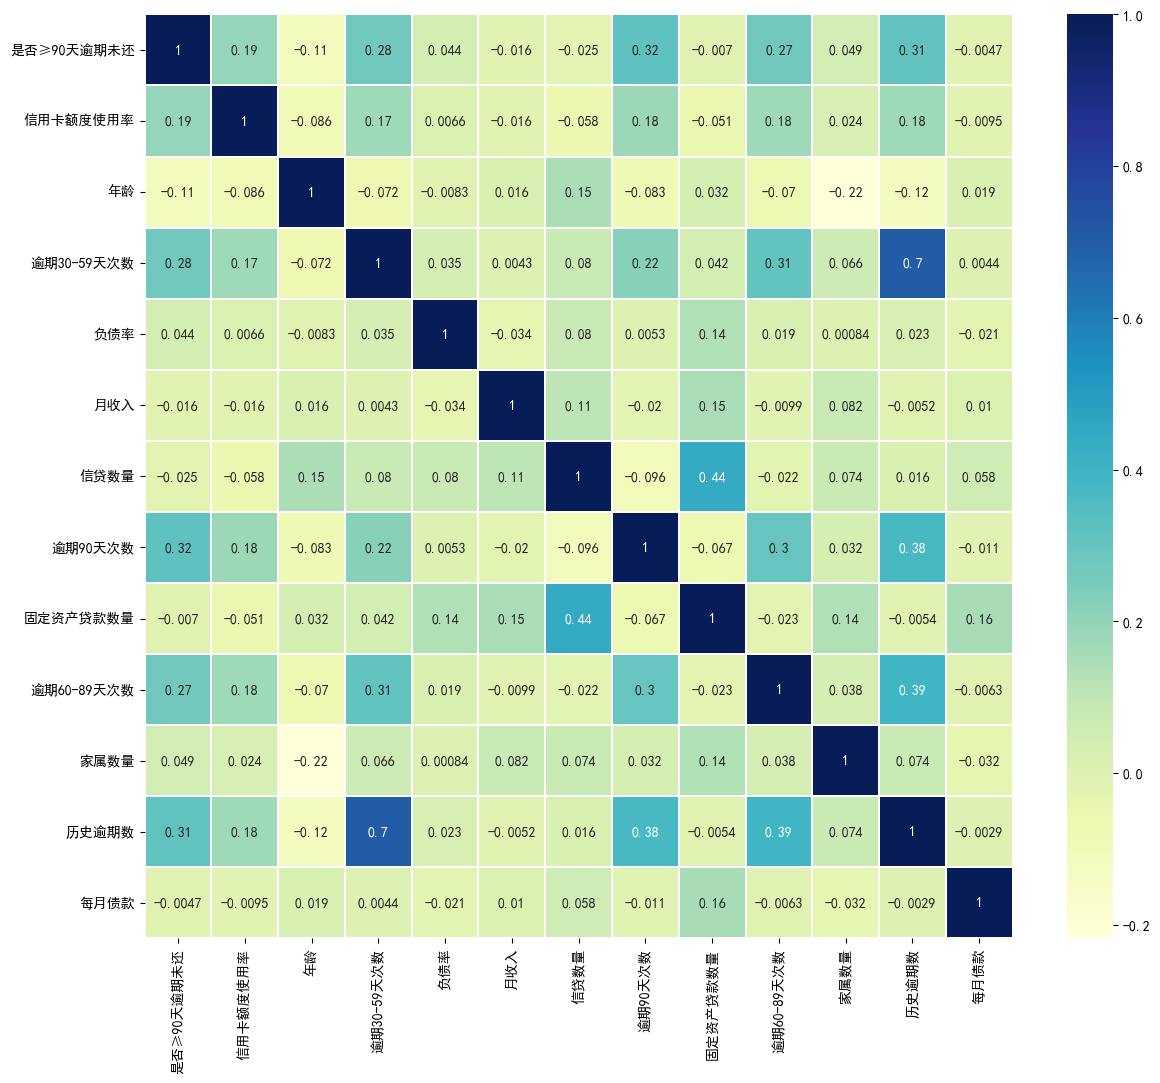

In [53]:
#分箱——特征选择：相关系数矩阵
corr=train_df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr,annot=True,linewidths=.3,cmap='YlGnBu')

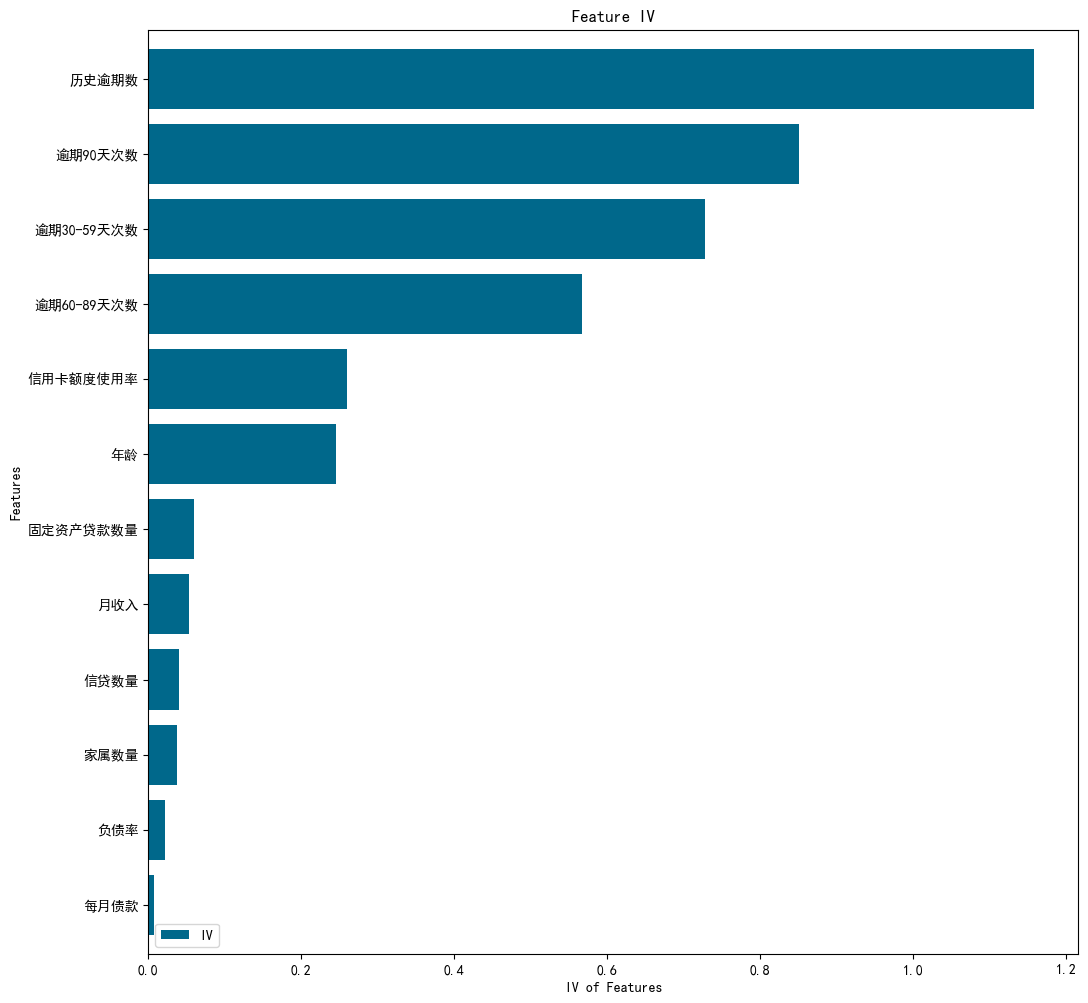

In [54]:
#特征选择——WOE分箱+IV值计算
def bin_woe(tar, var, n=None, cat=None):
    """
    连续自变量分箱,woe,iv变换
    tar:target目标变量
    var:进行woe,iv转换的自变量
    n:分组数量
    """
    total_bad = tar.sum()
    total_good =tar.count()-total_bad
    totalRate = total_good/total_bad
    
    if cat == 's':
        msheet = pd.DataFrame({tar.name:tar,var.name:var,'var_bins':pd.qcut(var, n, duplicates='drop')})
        grouped = msheet.groupby(['var_bins'])
    elif (cat == 'd') and (n is None):
        msheet = pd.DataFrame({tar.name:tar,var.name:var})
        grouped = msheet.groupby([var.name])
        
    groupBad = grouped.sum()[tar.name]
    groupTotal = grouped.count()[tar.name]
    groupGood = groupTotal - groupBad
    groupRate = groupGood/groupBad
    groupBadRate = groupBad/groupTotal
    groupGoodRate = groupGood/groupTotal

    woe = np.log(groupRate/totalRate)
    iv = np.sum((groupGood/total_good-groupBad/total_bad)*woe)
    
    if cat == 's':
        new_var, cut = pd.qcut(var, n, duplicates='drop',retbins=True, labels=woe.tolist())
    elif cat == 'd':
        dictmap = {}
        for x in woe.index:
            dictmap[x] = woe[x]
        new_var, cut = var.map(dictmap), woe.index
    
    return woe.tolist(), iv, cut, new_var# 确定变量类型，连续变量还是离散变量
dvar = ['信用卡额度使用率','负债率','逾期30-59天次数', '逾期60-89天次数','逾期90天次数','历史逾期数','家属数量',
        '固定资产贷款数量']
svar = ['月收入','年龄','每月债款','信贷数量']

# 可视化woe得分和iv得分
def woe_vs(data):
    cutdict = {}
    ivdict = {}
    woe_dict = {}
    woe_var = pd.DataFrame()
    for var in data.columns:
        if var in dvar:
            woe, iv, cut, new = bin_woe(data['是否≥90天逾期未还'], data[var], cat='d')
            woe_dict[var] = woe
            woe_var[var] = new
            ivdict[var] = iv
            cutdict[var] = cut
        elif var in svar:
            woe, iv, cut, new = bin_woe(data['是否≥90天逾期未还'], data[var], n=5, cat='s')
            woe_dict[var] = woe
            woe_var[var] = new
            ivdict[var] = iv
            cutdict[var] = cut
            
    ivdict = sorted(ivdict.items(), key=lambda x:x[1], reverse=False)
    iv_vs = pd.DataFrame([x[1] for x in ivdict],index=[x[0] for x in ivdict],columns=['IV'])
    ax = iv_vs.plot(kind='barh',
                    figsize=(12,12),
                    title='Feature IV',
                    fontsize=10,
                    width=0.8,
                    color='#00688B')
    ax.set_ylabel('Features')
    ax.set_xlabel('IV of Features')
    
    return ivdict, woe_var, woe_dict, cutdict

# woe转化
ivinfo, woe_data, woe_dict, cut_dict = woe_vs(train_df)
#得到结果：筛选出IV值大于0.1的变量：'逾期30-59天次数'，'逾期60-89天次数'，'逾期90天次数'，'历史逾期数'，'信用卡额度使用率'，'年龄'；又从以上相关性分析结果看出，'逾期30-59天次数'与'历史逾期数'具有强相关性（0.7），因此两者取IV值较高者'历史逾期数'。

In [55]:
#part 4 ——构建模型+模型评估
#LR模型
#分离训练集和测试集
from sklearn.model_selection import train_test_split
IV_info=['逾期60-89天次数','逾期90天次数','历史逾期数','信用卡额度使用率','年龄']
X=woe_data[IV_info]
y=train_df['是否≥90天逾期未还']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [56]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [57]:
#各变量都已通过显著性检验，满足要求
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

glmodel = sm.GLM(y_train,X_train,family=sm.families.Binomial()).fit()
glmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             是否≥90天逾期未还   No. Observations:               112297
Model:                            GLM   Df Residuals:                   112292
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -52321.
Date:                Thu, 13 Mar 2025   Deviance:                   1.0464e+05
Time:                        00:00:24   Pearson chi2:                 3.59e+06
No. Iterations:                     6   Pseudo R-squ. (CS):            -0.5646
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
逾期60-89天次数    -0.8017      0.021    -38.023      0.000      -0.843      -0.760
逾期90天次数       -1.7672      0.024    -75.066      0.000      -1.813      -1.721
历史逾期数         -0.4727      0.009    -53.827      0.000      -0.490      -0.456
信用卡额度使用率      -1.1151      0.032    -34.798      0.000      -1.178      -1.052
年龄            -0.5439      0.015    -36.045      0.000      -0.574      -0.514
==============================================================================
"""

In [58]:
#Logistic模型建立
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0,
                           solver="sag",
                           penalty="l2",
                           class_weight="balanced",
                           C=1.0,
                           max_iter=500)
model.fit(X_train, y_train)
model_proba = model.predict_proba(X_test)#predict_proba返回的结果是一个数组，包含两个元素，第一个元素是标签为0的概率值，第二个元素是标签为1的概率值
model_score=model_proba[:,1]

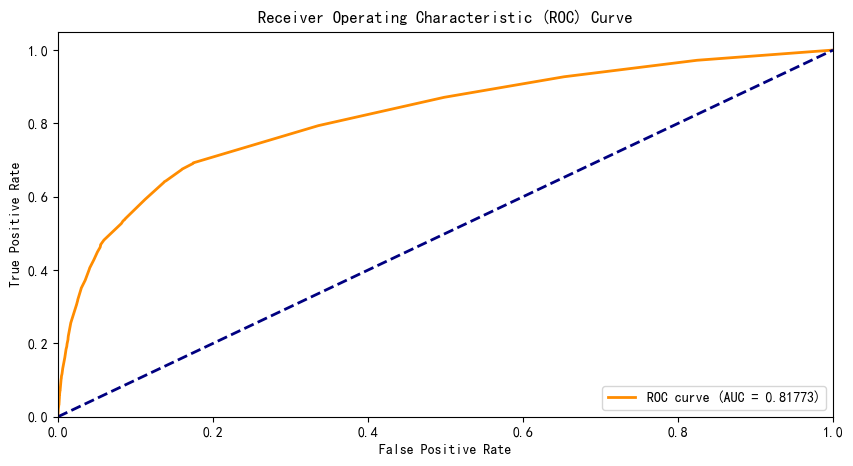

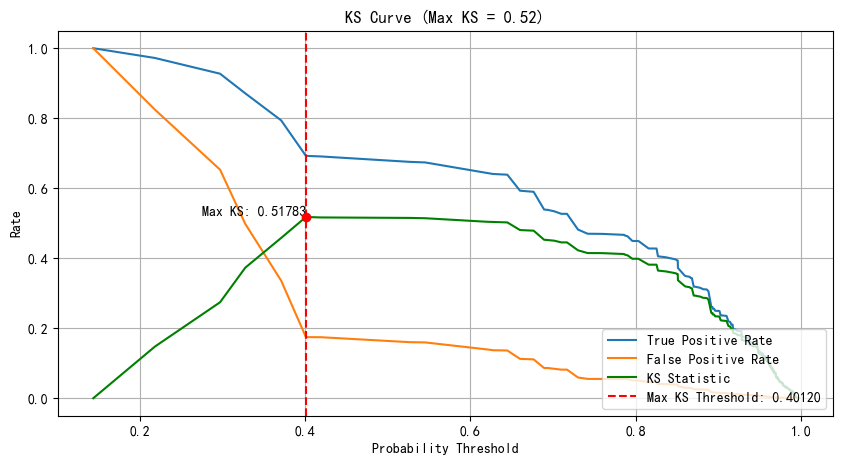

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, model_score)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 计算KS值
ks_values = tpr - fpr
ks_max = np.max(ks_values)
ks_max_index = np.argmax(ks_values)
ks_threshold = thresholds[ks_max_index]

# 绘制KS曲线
plt.figure(figsize=(10, 5))
plt.plot(thresholds, tpr, label='True Positive Rate')
plt.plot(thresholds, fpr, label='False Positive Rate')
plt.plot(thresholds, ks_values, label='KS Statistic', color='green')

# 标记最大KS值
plt.axvline(ks_threshold, color='red', linestyle='--', 
            label=f'Max KS Threshold: {ks_threshold:.5f}')
plt.scatter(ks_threshold, ks_max, color='red', zorder=5)
plt.text(ks_threshold, ks_max, f'Max KS: {ks_max:.5f}', 
         ha='right', va='bottom', fontsize=10)

plt.xlabel('Probability Threshold')
plt.ylabel('Rate')
plt.title('KS Curve (Max KS = %.2f)' % ks_max)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 初始化交叉验证策略（分层K折保证类别比例）
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 使用相同的模型参数
cv_model = LogisticRegression(random_state=0,
                             solver="sag",
                             penalty="l2",
                             class_weight="balanced",
                             C=1.0,
                             max_iter=500)

# 执行交叉验证（直接使用原始完整数据集X,y）
cv_scores = cross_val_score(cv_model, X, y, 
                           cv=cv, 
                           scoring='roc_auc')

# 输出交叉验证结果
print(f"交叉验证各折AUC: {[round(score, 3) for score in cv_scores]}")
print(f"平均AUC: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

交叉验证各折AUC: [0.817, 0.815, 0.83, 0.804, 0.825]
平均AUC: 0.818 ± 0.009


In [61]:
# 建立评分卡模型
#通过比较AUC和KS,最终选择LightGBM
#XGB给年龄，每月债款，月收入，信贷数量等特征有更高的重要性
intercept=model.intercept_
coef=model.coef_
coe=coef[0].tolist()
coe_df=pd.DataFrame({'feature':IV_info,'coe':coe})

import math
B=20/math.log(2)
A=600+B*math.log(1/20)
#基础分
score=round(A-B*intercept[0],0)

featurelist = []
woelist = []
cutlist = []
for k,v in woe_dict.items():
    if k in IV_info:
        for n in range(0,len(v)):
            featurelist.append(k)
            woelist.append(v[n])
            cutlist.append(cut_dict[k][n])
scoreboard = pd.DataFrame({'feature':featurelist,'woe':woelist,'cut':cutlist},
                          columns=['feature','cut','woe'])
score_df=pd.merge(scoreboard,coe_df)
score_df['score']=round(-B*score_df['woe']*score_df['coe'],0)
score_df.drop('coe',axis=1,inplace=True)
score_df

,feature,cut,woe,score
0,信用卡额度使用率,0.0,0.119231,2.0
1,信用卡额度使用率,1.0,-2.226411,-38.0
2,年龄,21.0,-0.487183,-11.0
3,年龄,39.0,-0.252557,-6.0
4,年龄,48.0,-0.078292,-2.0
5,年龄,56.0,0.430123,10.0
6,年龄,65.0,1.054168,25.0
7,逾期90天次数,0.0,0.375825,5.0
8,逾期90天次数,1.0,-1.971860,-28.0
9,逾期90天次数,2.0,-2.646308,-37.0


交叉验证结果:
各折AUC: [0.837, 0.835, 0.85, 0.826, 0.844]
平均AUC: 0.838 ± 0.008

测试集AUC: 0.837


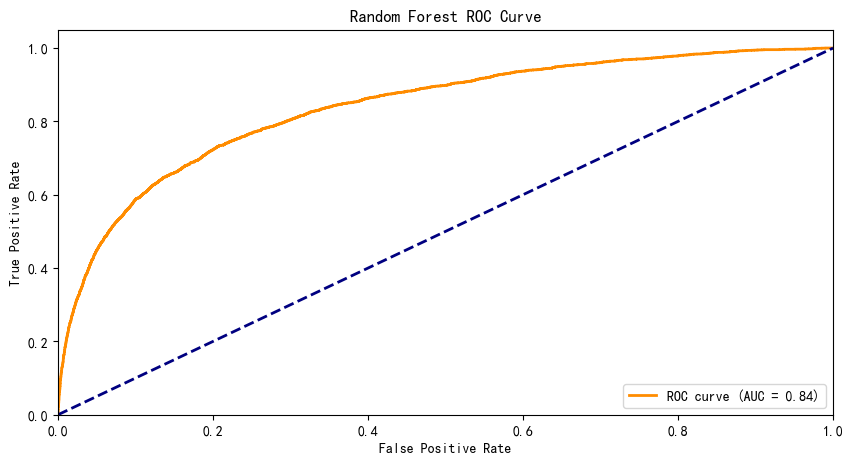

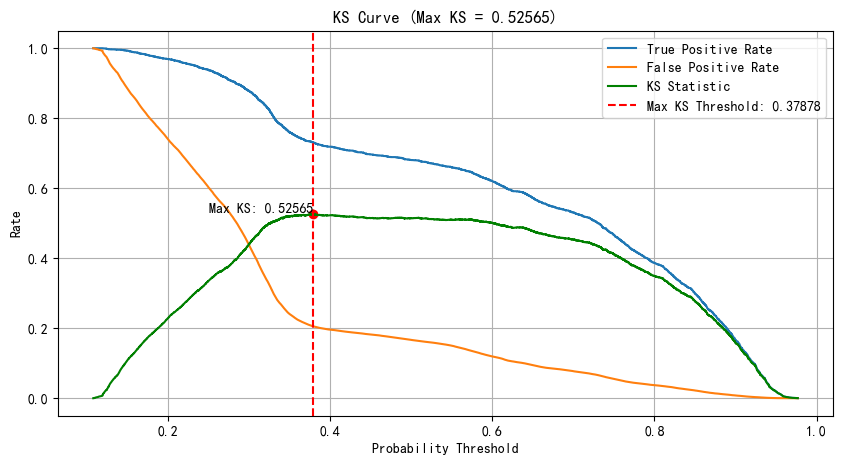

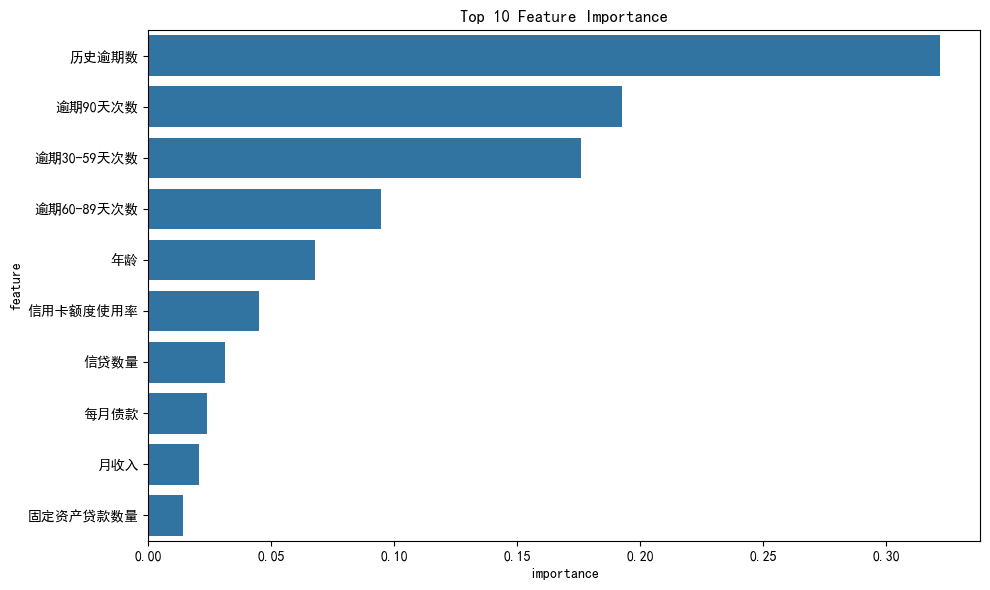

In [62]:
 #随机森林RF模型
# 数据准备
from sklearn.ensemble import RandomForestClassifier
X = train_df.drop(columns=['是否≥90天逾期未还'])
y=train_df['是否≥90天逾期未还']

# 数据分割（保持与y的索引对齐）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  # 保持分层抽样
)
# 初始化随机森林模型
rf_model = RandomForestClassifier(
    n_estimators=200,       # 增加树的数量
    max_depth=8,            # 适当增加深度
    min_samples_leaf=5,     # 防止过拟合
    class_weight="balanced_subsample",  # 改进类别平衡
    random_state=42,
    n_jobs=-1
)

# 交叉验证评估
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, 
                          cv=cv, 
                          scoring="roc_auc")

print("交叉验证结果:")
print(f"各折AUC: {[round(score, 3) for score in cv_scores]}")
print(f"平均AUC: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}\n")

# 训练与预测
rf_model.fit(X_train, y_train)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# 计算测试集AUC
test_auc = roc_auc_score(y_test, y_proba)
print(f"测试集AUC: {test_auc:.3f}")

# 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.show()

# 计算KS值
ks_values = tpr - fpr
ks_max = np.max(ks_values)
ks_threshold = thresholds[np.argmax(ks_values)]

# 绘制KS曲线
plt.figure(figsize=(10, 5))
plt.plot(thresholds, tpr, label="True Positive Rate")
plt.plot(thresholds, fpr, label="False Positive Rate")
plt.plot(thresholds, ks_values, label="KS Statistic", color="green")

plt.axvline(ks_threshold, color="red", linestyle="--",
           label=f"Max KS Threshold: {ks_threshold:.5f}")
plt.scatter(ks_threshold, ks_max, color="red")
plt.text(ks_threshold, ks_max, f"Max KS: {ks_max:.5f}", 
        ha="right", va="bottom")

plt.xlabel("Probability Threshold")
plt.ylabel("Rate")
plt.title(f"KS Curve (Max KS = {ks_max:.5f})")
plt.legend()
plt.grid(True)
plt.show()

# 特征重要性可视化（新增）
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

In [63]:
pip install xgboost

c:\users\legion\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\legion\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\legion\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\legion\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\legion\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

交叉验证结果:
各折AUC: [0.553, 0.56, 0.544, 0.556, 0.556]
平均AUC: 0.554 ± 0.005

测试集AUC: 0.84040


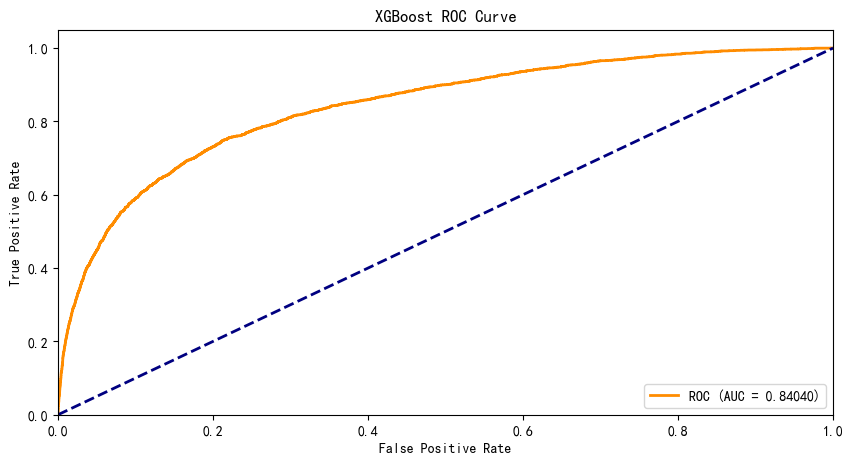

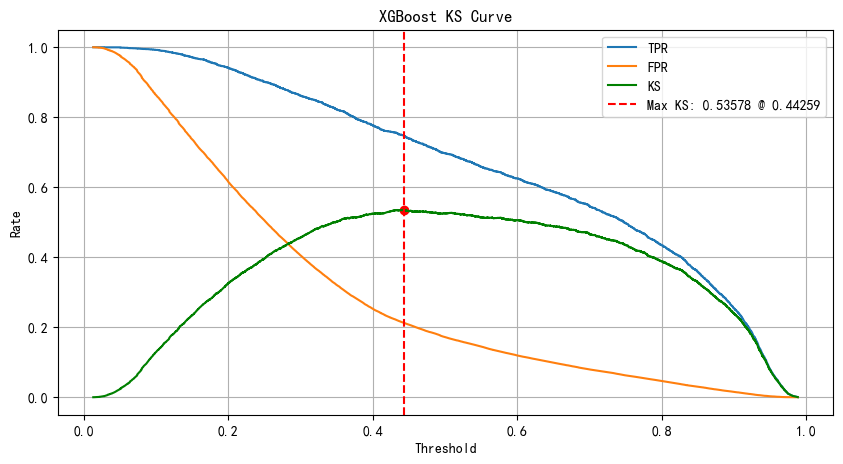

<Figure size 1000x600 with 0 Axes>

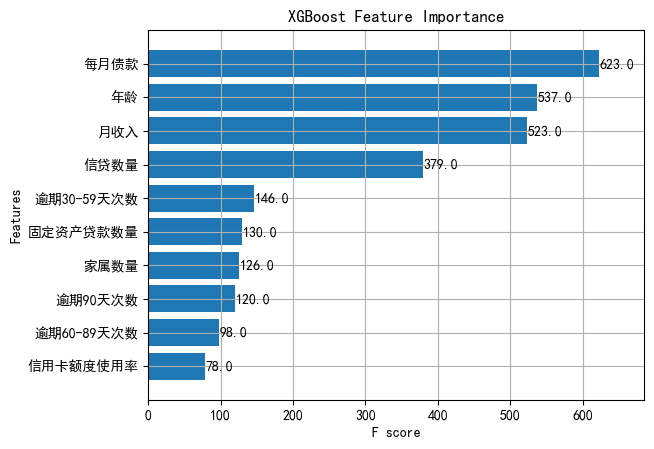

In [68]:
#极限梯度提升XGB模型
import xgboost as xgb
# 数据准备
y = train_df['是否≥90天逾期未还']
X = train_df.drop(columns=['是否≥90天逾期未还'])  

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

# 计算类别权重
ratio = np.sum(y == 0) / np.sum(y == 1)  # 处理类别不平衡

# 初始化XGB模型
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,  # 固定树的数量
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=ratio,
    random_state=42,
    n_jobs=-1
)

# 交叉验证评估
cv_scores = cross_val_score(
    cv_model, 
    X, y,
    cv=StratifiedKFold(n_splits=5),
    scoring='roc_auc',
    error_score='raise'  # 显示详细错误
)
print("交叉验证结果:")
print(f"各折AUC: {[round(score, 3) for score in cv_scores]}")
print(f"平均AUC: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}\n")

# 模型训练（添加早停机制）
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # 监控测试集表现
    verbose=False
)

# 预测概率
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# 测试集评估
test_auc = roc_auc_score(y_test, y_proba)
print(f"测试集AUC: {test_auc:.5f}")

# 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC (AUC = {roc_auc:.5f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 计算并绘制KS曲线
ks_values = tpr - fpr
ks_max = np.max(ks_values)
ks_threshold = thresholds[np.argmax(ks_values)]

plt.figure(figsize=(10,5))
plt.plot(thresholds, tpr, label='TPR')
plt.plot(thresholds, fpr, label='FPR')
plt.plot(thresholds, ks_values, label='KS', color='green')

plt.axvline(ks_threshold, color='red', linestyle='--',
            label=f'Max KS: {ks_max:.5f} @ {ks_threshold:.5f}')
plt.scatter(ks_threshold, ks_max, color='red')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('XGBoost KS Curve')
plt.legend()
plt.grid(True)
plt.show()

# 特征重要性可视化
plt.figure(figsize=(10,6))
xgb.plot_importance(
    xgb_model, 
    importance_type='weight',  # 可选 'weight', 'gain', 'cover'
    max_num_features=10,
    height=0.8
)
plt.title('XGBoost Feature Importance')
plt.show()


In [65]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



Fold 1
[50]	valid_0's auc: 0.844438
[100]	valid_0's auc: 0.846199
Fold 1 AUC: 0.84620

Fold 2
[50]	valid_0's auc: 0.842004
[100]	valid_0's auc: 0.844153
Fold 2 AUC: 0.84415

Fold 3
[50]	valid_0's auc: 0.854695
[100]	valid_0's auc: 0.855354
Fold 3 AUC: 0.85545

Fold 4
[50]	valid_0's auc: 0.834666
[100]	valid_0's auc: 0.836957
Fold 4 AUC: 0.83696

Fold 5
[50]	valid_0's auc: 0.848444
[100]	valid_0's auc: 0.849418
Fold 5 AUC: 0.84959

交叉验证结果:
各折AUC: [0.8462, 0.8442, 0.8554, 0.837, 0.8496]
平均AUC: 0.84647 ± 0.00610

测试集AUC: 0.84251


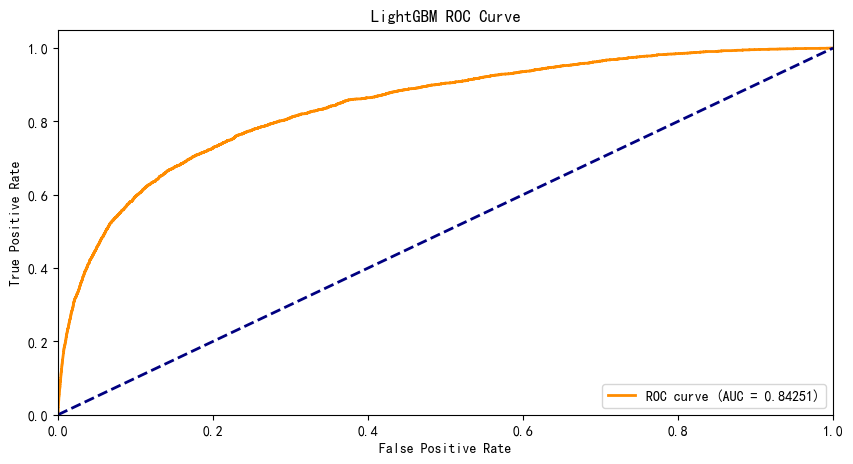

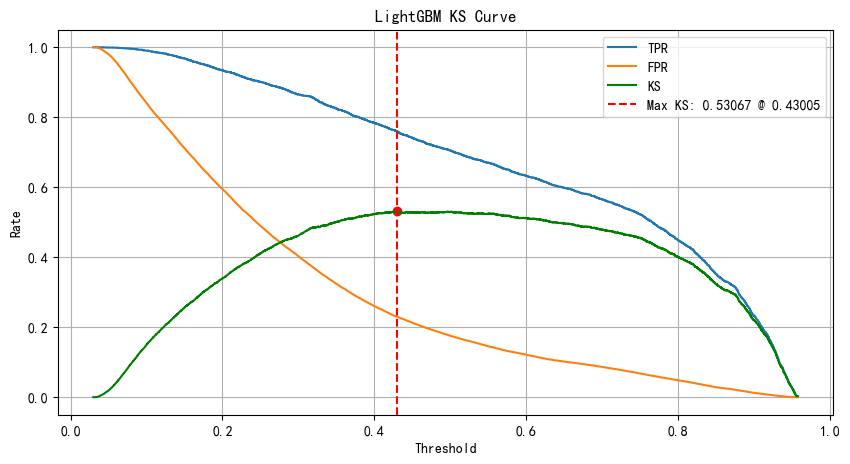

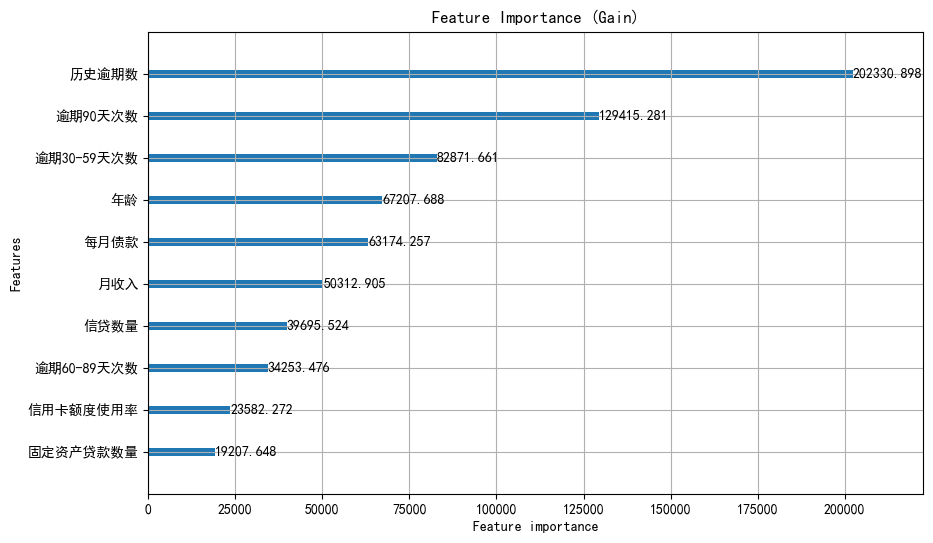

In [67]:
#LightGBM轻量级梯度提升模型
import lightgbm as lgb
from joblib import dump
# 数据准备
y = train_df['是否≥90天逾期未还']
X = train_df.drop(columns=['是否≥90天逾期未还'])

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

# 定义LightGBM参数
lgb_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'scale_pos_weight': len(y[y==0])/len(y[y==1]),  # 处理类别不平衡
    'verbose': -1,
    'random_state': 42,
    'n_jobs': -1
}

# 交叉验证评估
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc_scores = []

for fold, (train_idx, valid_idx) in enumerate(cv.split(X, y)):
    print(f"\nFold {fold+1}")
    
    # 数据划分
    X_trn, X_val = X.iloc[train_idx], X.iloc[valid_idx]
    y_trn, y_val = y.iloc[train_idx], y.iloc[valid_idx]
    
    # 创建Dataset加速训练
    train_data = lgb.Dataset(X_trn, label=y_trn)
    valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
    
    # 模型训练（含早停）
    model = lgb.train(
        params=lgb_params,
        train_set=train_data,
        valid_sets=[valid_data],
        callbacks=[
            lgb.early_stopping(stopping_rounds=30, verbose=False),
            lgb.log_evaluation(50)
        ]
    )
    
    # 验证集预测
    y_pred = model.predict(X_val)
    fold_auc = roc_auc_score(y_val, y_pred)
    cv_auc_scores.append(fold_auc)
    print(f"Fold {fold+1} AUC: {fold_auc:.5f}")

print("\n交叉验证结果:")
print(f"各折AUC: {[round(score,4) for score in cv_auc_scores]}")
print(f"平均AUC: {np.mean(cv_auc_scores):.5f} ± {np.std(cv_auc_scores):.5f}")

# 全量数据训练最佳模型
final_model = lgb.LGBMClassifier(**lgb_params)
final_model.fit(X_train, y_train)
# 保存模型
dump(final_model, 'final_model.joblib')

# 测试集预测
y_proba = final_model.predict_proba(X_test)[:, 1]

# 计算测试集AUC
test_auc = roc_auc_score(y_test, y_proba)
print(f"\n测试集AUC: {test_auc:.5f}")

# 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.5f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 计算并绘制KS曲线
ks_values = tpr - fpr
ks_max = np.max(ks_values)
ks_threshold = thresholds[np.argmax(ks_values)]

plt.figure(figsize=(10,5))
plt.plot(thresholds, tpr, label='TPR')
plt.plot(thresholds, fpr, label='FPR')
plt.plot(thresholds, ks_values, label='KS', color='green')

plt.axvline(ks_threshold, color='red', linestyle='--',
            label=f'Max KS: {ks_max:.5f} @ {ks_threshold:.5f}')
plt.scatter(ks_threshold, ks_max, color='red')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('LightGBM KS Curve')
plt.legend()
plt.grid(True)
plt.show()

# 特征重要性可视化
lgb.plot_importance(
    final_model, 
    importance_type='gain', 
    max_num_features=10
    ,
    figsize=(10,6)
)
plt.title('Feature Importance (Gain)')
plt.show()

In [70]:
#将最优的LightGBM运用到测试集上
from joblib import load
#导入模型
final_model_loaded = load('final_model.joblib')

#导入测试集
test_df=pd.read_csv('cs-test.csv').drop('Unnamed: 0',axis=1)
colnames={'SeriousDlqin2yrs':'是否≥90天逾期未还', #目标变量，1表示坏客户，0表示好客户
         'RevolvingUtilizationOfUnsecuredLines':'信用卡额度使用率',
          'age':'年龄',
         'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天次数',
          'DebtRatio':'负债率',
          'MonthlyIncome':'月收入',
         'NumberOfOpenCreditLinesAndLoans':'信贷数量',
         'NumberOfTimes90DaysLate':'逾期90天次数',
         'NumberRealEstateLoansOrLines':'固定资产贷款数量',
         'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天次数',
         'NumberOfDependents':'家属数量'}
test_df=test_df.rename(columns=colnames)
test_df['家属数量'].fillna(test_df['家属数量'].mean(),inplace=True)
test_df['月收入'].fillna(test_df['月收入'].mean(),inplace=True)
test_df['历史逾期数']=test_df['逾期30-59天次数']+test_df['逾期60-89天次数']+test_df['逾期90天次数']
test_df['每月债款']=test_df['负债率']*test_df['月收入']
test_df=test_df.drop(['是否≥90天逾期未还'],axis=1)

#预测概率
y_prob = final_model_loaded.predict_proba(test_df)[:, 1]

# 保存结果（概率 + 类别）
test_df['Id'] = range(1,len(test_df)+1)
results = pd.DataFrame({
    "ID": test_df["Id"],
    "Probability": y_prob,
})
results.to_csv("submission.csv", index=False)